In [1]:
# olist_eda_and_segmentation.ipynb

# 1. Environment Setup and Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
import datetime as dt
import matplotlib.ticker as mtick
import os
import zipfile

# Configure Pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Configure default float display format to avoid scientific notation for general output
# pd.options.display.float_format = '{:,.2f}'.format # Displays 2 decimal places, with comma as thousands separator

# Configure default plot settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# List to store paths of saved charts
saved_chart_files = []
# Directory to save charts
charts_dir = 'charts'
os.makedirs(charts_dir, exist_ok=True) # Create the directory if it doesn't exist
print(f"Charts will be saved in the '{charts_dir}/' directory.")

Charts will be saved in the 'charts/' directory.


# 🚀 Olist E-commerce Data Analysis: EDA & Customer Segmentation

## Table of Contents

1.  **Introduction & Environment Setup**
2.  **Data Loading & Preprocessing**
3.  **Feature Engineering**
4.  **Deep Exploratory Data Analysis (EDA)**
5.  **Customer Segmentation with Machine Learning (K-Means)**
6.  **Interpretation & Business Recommendations**

## 1. Introduction & Environment Setup

This notebook will guide us through a comprehensive data science pipeline on the Olist public e-commerce dataset. The goal is to uncover shopping trends, evaluate performance, and segment customers to derive valuable business recommendations.

We have already imported all necessary libraries at the beginning of the notebook.

## 2. Data Loading & Preprocessing

In this step, we will first set up Kaggle to download the dataset, then load all necessary CSV files, merge them into a single comprehensive DataFrame, and perform basic preprocessing steps such as handling missing values and converting data types.


### 2.1. Download Olist Dataset from Kaggle
This section includes the code to install the Kaggle library, configure it, and download the dataset directly from Kaggle. This is a great way to ensure data availability.


In [2]:
# Install the Kaggle library. The '-q' flag makes the output quieter.
!pip install -q kaggle
print(f"The 'kaggle' library has been checked/installed.")

# If running in Google Colab, you'll typically need to upload your kaggle.json file
from google.colab import files
files.upload()
# Then move it to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
# Make sure you have configured your Kaggle API key
!kaggle datasets download -d olistbr/brazilian-ecommerce
print(f"Dataset 'brazilian-ecommerce.zip' downloaded.")

# Unzip the downloaded dataset into the 'data/' directory
!mkdir -p data # Create 'data' directory if it doesn't exist
!unzip -q brazilian-ecommerce.zip -d data
print(f"Dataset unzipped into 'data/' directory.")

The 'kaggle' library has been checked/installed.


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.13GB/s]
Dataset 'brazilian-ecommerce.zip' downloaded.
Dataset unzipped into 'data/' directory.


### 2.2. Load and Merge DataFrames

Now, we will load the extracted CSV files and merge them into a single main DataFrame for analysis.


In [3]:
# Define the path to the data directory
data_path = './data/' # Assuming the unzipped files are directly in the './data/' folder

# Load and inspect customers_df
customers_df = pd.read_csv(data_path + 'olist_customers_dataset.csv')
print("\n--- customers_df ---")
print(f"\nShape: {customers_df.shape}")
display(customers_df.head())
print("\nInfo for customers_df:")
customers_df.info()
print(f"\nMissing values in customers_df:\n{customers_df.isnull().sum()}")
print(f"\nDuplicate rows in customers_df: {customers_df.duplicated().sum()}")
print("-" * 30) # Separator for readability

# Load and inspect orders_df
orders_df = pd.read_csv(data_path + 'olist_orders_dataset.csv')
print("\n--- orders_df ---")
print(f"\nShape: {orders_df.shape}")
display(orders_df.head())
print("\nInfo for orders_df:")
orders_df.info()
print(f"\nMissing values in orders_df:\n{orders_df.isnull().sum()}")
print(f"\nDuplicate rows in orders_df: {orders_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect order_items_df
order_items_df = pd.read_csv(data_path + 'olist_order_items_dataset.csv')
print("\n--- order_items_df ---")
print(f"\nShape: {order_items_df.shape}")
display(order_items_df.head())
print("\nInfo for order_items_df:")
order_items_df.info()
print(f"\nMissing values in order_items_df:\n{order_items_df.isnull().sum()}")
print(f"\nDuplicate rows in order_items_df: {order_items_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect products_df
products_df = pd.read_csv(data_path + 'olist_products_dataset.csv')
print("\n--- products_df ---")
print(f"\nShape: {products_df.shape}")
display(products_df.head())
print("\nInfo for products_df:")
products_df.info()
print(f"\nMissing values in products_df:\n{products_df.isnull().sum()}")
print(f"\nDuplicate rows in products_df: {products_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect sellers_df
sellers_df = pd.read_csv(data_path + 'olist_sellers_dataset.csv')
print("\n--- sellers_df ---")
print(f"\nShape: {sellers_df.shape}")
display(sellers_df.head())
print("\nInfo for sellers_df:")
sellers_df.info()
print(f"\nMissing values in sellers_df:\n{sellers_df.isnull().sum()}")
print(f"\nDuplicate rows in sellers_df: {sellers_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect order_payments_df
order_payments_df = pd.read_csv(data_path + 'olist_order_payments_dataset.csv')
print("\n--- order_payments_df ---")
print(f"\nShape: {order_payments_df.shape}")
display(order_payments_df.head())
print("\nInfo for order_payments_df:")
order_payments_df.info()
print(f"\nMissing values in order_payments_df:\n{order_payments_df.isnull().sum()}")
print(f"\nDuplicate rows in order_payments_df: {order_payments_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect order_reviews_df
order_reviews_df = pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
print("\n--- order_reviews_df ---")
print(f"\nShape: {order_reviews_df.shape}")
display(order_reviews_df.head())
print("\nInfo for order_reviews_df:")
order_reviews_df.info()
print(f"\nMissing values in order_reviews_df:\n{order_reviews_df.isnull().sum()}")
print(f"\nDuplicate rows in order_reviews_df: {order_reviews_df.duplicated().sum()}")
print("-" * 30)

# Load and inspect product_category_translation_df
product_category_translation_df = pd.read_csv(data_path + 'product_category_name_translation.csv')
print("\n--- product_category_translation_df ---")
print(f"\nShape: {product_category_translation_df.shape}")
display(product_category_translation_df.head())
print("\nInfo for product_category_translation_df:")
product_category_translation_df.info()
print(f"\nMissing values in product_category_translation_df:\n{product_category_translation_df.isnull().sum()}")
print(f"\nDuplicate rows in product_category_translation_df: {product_category_translation_df.duplicated().sum()}")
print("-" * 30)

# geolocation_df is commented out due to its large size and non-essential nature for core RFM & trend analysis.
# If needed for specific geospatial analysis, uncomment and inspect similarly.
# geolocation_df = pd.read_csv(data_path + 'olist_geolocation_dataset.csv')
# print("\n--- geolocation_df (Commented out - very large file) ---")
# print(f"\nShape: {geolocation_df.shape}")
# display(geolocation_df.head())
# print("\nInfo for geolocation_df:")
# geolocation_df.info()
# print(f"\nMissing values in geolocation_df:\n{geolocation_df.isnull().sum()}")
# print(f"\nDuplicate rows in geolocation_df: {geolocation_df.duplicated().sum()}")
# print("-" * 30)


--- customers_df ---

Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Info for customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing values in customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicate rows in customers_df: 0
------------------------------

--- orders_df ---

Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Info for orders_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Missing values in orders_df:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carri

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Info for order_items_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing values in order_items_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplicate rows in order_items_df: 0
------------------------------

--- products_df ---

Shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Info for products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Missing values in products_df:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty    

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Info for sellers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Missing values in sellers_df:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Duplicate rows in sellers_df: 0
------------------------------

--- order_payments_df ---

Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Info for order_payments_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Missing values in order_payments_df:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicate rows in order_payments_df: 0
------------------------------

--- order_reviews_df ---

Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Info for order_reviews_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Missing values in order_reviews_df:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Duplicate rows in order_reviews_df: 0
-----------------

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



Info for product_category_translation_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Missing values in product_category_translation_df:
product_category_name            0
product_category_name_english    0
dtype: int64

Duplicate rows in product_category_translation_df: 0
------------------------------


### 2.3. Merging DataFrames

We will merge the DataFrames in a logical order to create a comprehensive view of the orders.

**Note on Geolocation Data:** The `olist_geolocation_dataset.csv` is very large and contains multiple lat/long entries for each postal code. It's not directly mergeable with the main transaction data without aggregation or specific use cases (e.g., finding average coordinates per city, or specific customer/seller locations for mapping). We will load it but not merge it into the main `merged_df` unless a specific geospatial analysis is intended later. For the current analysis goals, it is not required.

In [4]:
print(f"\nAll primary DataFrames loaded and initially inspected. Starting merge process.")

# Merge order_items_df and products_df (to get product information)
# Step 1: Merging order_items with products
merged_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

# Step 2: Merging with orders_df (to get order information, purchase date)
merged_df = pd.merge(merged_df, orders_df, on='order_id', how='left')

# Step 3: Merging with customers_df (to get customer information)
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Step 4: Merging with order_payments_df (to get payment information)
merged_df = pd.merge(merged_df, order_payments_df, on='order_id', how='left')

# Step 5: Merging with order_reviews_df (to get review information)
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='left')

# Step 6: Merging with product_category_translation_df (to translate product category names)
merged_df = pd.merge(merged_df, product_category_translation_df, on='product_category_name', how='left')

# Step 7: Merging with sellers_df (to get seller information)
merged_df = pd.merge(merged_df, sellers_df, on='seller_id', how='left')

# Note: geolocation_df is loaded but not merged here due to its size and nature (multiple entries per zip code).
# It would typically be used for specific geospatial analysis, perhaps by aggregating lat/long per postal code
# and then merging aggregated data if needed, or used directly for mapping.

print(f"\nAll primary DataFrames merged successfully.")
print(f"\nFinal Merged DataFrame Shape: {merged_df.shape}")
display(merged_df.head())
print(f"\nInfo for merged_df:")
merged_df.info() # Also check info of the final merged_df
print(f"\nMissing values in merged_df:\n{merged_df.isnull().sum()}")
print(f"\nDuplicate rows in merged_df: {merged_df.duplicated().sum()}")


All primary DataFrames loaded and initially inspected. Starting merge process.

All primary DataFrames merged successfully.

Final Merged DataFrame Shape: (118310, 40)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,garden_tools,87900,loanda,PR



Info for merged_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116601 non-null  object 
 8   product_name_lenght            116601 non-null  float64
 9   product_description_lenght     116601 non-null  float64
 10  product_photos_qty             116601 non-null  float64
 11  product_weight_g               118290 non-null  float64
 12  product_l

### 2.4. Data Preprocessing: Data Types and Missing Values

* Convert datetime columns to `datetime` format.
* Handle missing values (NaNs). For date data, fill with `NaT` if information is absent, or `mode`/`median` depending on context. For categorical columns, fill with 'unknown' or 'missing'.


In [5]:
# Convert datetime columns
date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'
]
for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce') # 'coerce' will turn errors into NaT

print(f"\nDatetime columns converted.")

# Check for missing values again after datetime conversion
print(f"\nChecking for missing values after datetime conversion and merging:")
missing_values = merged_df.isnull().sum()
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percentage})
display(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

# Handle missing values (e.g., fill or drop as per context)
# Columns critical for order/customer analysis should not have NaNs.
merged_df['product_category_name'] = merged_df['product_category_name'].fillna('unknown')
merged_df['product_category_name_english'] = merged_df['product_category_name_english'].fillna('unknown')
merged_df['review_comment_message'] = merged_df['review_comment_message'].fillna('no_comment')
merged_df['review_comment_title'] = merged_df['review_comment_title'].fillna('no_title')
merged_df['payment_type'] = merged_df['payment_type'].fillna('unknown') # Ensure payment type is filled too

# For the purpose of analyzing completed purchase behavior, we'll focus on orders with a delivery date.
# We are dropping rows where 'order_delivered_customer_date' is null, as per the original README analysis scope.
merged_df_cleaned = merged_df.dropna(subset=[
    'order_delivered_customer_date', # Dropping rows where this is null
    'order_purchase_timestamp',
    'price',
    'freight_value',
    'customer_unique_id',
    'order_id' # Ensuring order_id is not null as it's critical for frequency
]).copy()

print(f"\nSome missing values handled and data cleaned.")
print(f"\nDataFrame shape after cleaning: {merged_df_cleaned.shape}")
display(merged_df_cleaned.head()) # Display head after cleaning
print(f"\nInfo for merged_df_cleaned:")
merged_df_cleaned.info() # Display info after cleaning
print(f"\nMissing values in merged_df_cleaned:\n{merged_df_cleaned.isnull().sum()}")
print(f"\nDuplicate rows in merged_df_cleaned: {merged_df_cleaned.duplicated().sum()}") # Check duplicates again after cleaning



Datetime columns converted.

Checking for missing values after datetime conversion and merging:


,Missing Count,Missing %
review_comment_title,104418,88.257966
review_comment_message,68628,58.006931
order_delivered_customer_date,2588,2.187474
product_category_name_english,1734,1.465641
product_category_name,1709,1.444510
product_name_lenght,1709,1.444510
product_photos_qty,1709,1.444510
product_description_lenght,1709,1.444510
order_delivered_carrier_date,1254,1.059927
review_id,978,0.826642



Some missing values handled and data cleaned.

DataFrame shape after cleaning: (115722, 40)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,no_title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,no_title,no_comment,2017-05-13,2017-05-15 11:34:13,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,no_title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,no_title,no_comment,2018-08-15,2018-08-15 16:39:01,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,no_title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,garden_tools,87900,loanda,PR



Info for merged_df_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 115722 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115722 non-null  object        
 1   order_item_id                  115722 non-null  int64         
 2   product_id                     115722 non-null  object        
 3   seller_id                      115722 non-null  object        
 4   shipping_limit_date            115722 non-null  datetime64[ns]
 5   price                          115722 non-null  float64       
 6   freight_value                  115722 non-null  float64       
 7   product_category_name          115722 non-null  object        
 8   product_name_lenght            114084 non-null  float64       
 9   product_description_lenght     114084 non-null  float64       
 10  product_photos_qty             114084 non-nu

## 3. Feature Engineering

In this section, we will create new features from the existing data to support our analysis and modeling.

In [6]:
# Calculate the total price per item (product price + freight value)
merged_df_cleaned['item_total_price'] = merged_df_cleaned['price'] + merged_df_cleaned['freight_value']

# Calculate the total order value (if multiple items in one order)
# Group by order_id to sum up the total value for each order
order_total_value = merged_df_cleaned.groupby('order_id')['item_total_price'].sum().reset_index()
order_total_value = order_total_value.rename(columns={'item_total_price': 'order_total_value'})
merged_df_cleaned = pd.merge(merged_df_cleaned, order_total_value, on='order_id', how='left')
display(merged_df_cleaned.head())

# Calculate actual delivery days and delay days
merged_df_cleaned['actual_delivery_days'] = (merged_df_cleaned['order_delivered_customer_date'] - merged_df_cleaned['order_purchase_timestamp']).dt.days
merged_df_cleaned['delivery_delay_days'] = (merged_df_cleaned['order_delivered_customer_date'] - merged_df_cleaned['order_estimated_delivery_date']).dt.days

# Create detailed time-based features from purchase timestamp
merged_df_cleaned['purchase_year'] = merged_df_cleaned['order_purchase_timestamp'].dt.year
merged_df_cleaned['purchase_month'] = merged_df_cleaned['order_purchase_timestamp'].dt.month
merged_df_cleaned['purchase_dayofweek'] = merged_df_cleaned['order_purchase_timestamp'].dt.dayofweek
merged_df_cleaned['purchase_hour'] = merged_df_cleaned['order_purchase_timestamp'].dt.hour
merged_df_cleaned['purchase_day'] = merged_df_cleaned['order_purchase_timestamp'].dt.day

# Create a column to check for late delivery
merged_df_cleaned['is_late_delivery'] = merged_df_cleaned['delivery_delay_days'] > 0

print(f"\nNew features created.")
display(merged_df_cleaned.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,item_total_price,order_total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,no_title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,cool_stuff,27277,volta redonda,SP,72.19,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,no_title,no_comment,2017-05-13,2017-05-15 11:34:13,pet_shop,3471,sao paulo,SP,259.83,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,no_title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,furniture_decor,37564,borda da mata,MG,216.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,no_title,no_comment,2018-08-15,2018-08-15 16:39:01,perfumery,14403,franca,SP,25.78,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,no_title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,garden_tools,87900,loanda,PR,218.04,218.04



New features created.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,item_total_price,order_total_value,actual_delivery_days,delivery_delay_days,purchase_year,purchase_month,purchase_dayofweek,purchase_hour,purchase_day,is_late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,no_title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,cool_stuff,27277,volta redonda,SP,72.19,72.19,7,-9,2017,9,2,8,13,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,no_title,no_comment,2017-05-13,2017-05-15 11:34:13,pet_shop,3471,sao paulo,SP,259.83,259.83,16,-3,2017,4,2,10,26,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,no_title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,furniture_decor,37564,borda da mata,MG,216.87,216.87,7,-14,2018,1,6,14,14,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,no_title,no_comment,2018-08-15,2018-08-15 16:39:01,perfumery,14403,franca,SP,25.78,25.78,6,-6,2018,8,2,10,8,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,no_title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,garden_tools,87900,loanda,PR,218.04,218.04,25,-16,2017,2,5,13,4,False


## 4. Deep Exploratory Data Analysis (EDA)

This section will explore key trends and characteristics of the Olist e-commerce data through visualizations.


### 4.1. Time-Series Analysis

#### Monthly/yearly sales trends

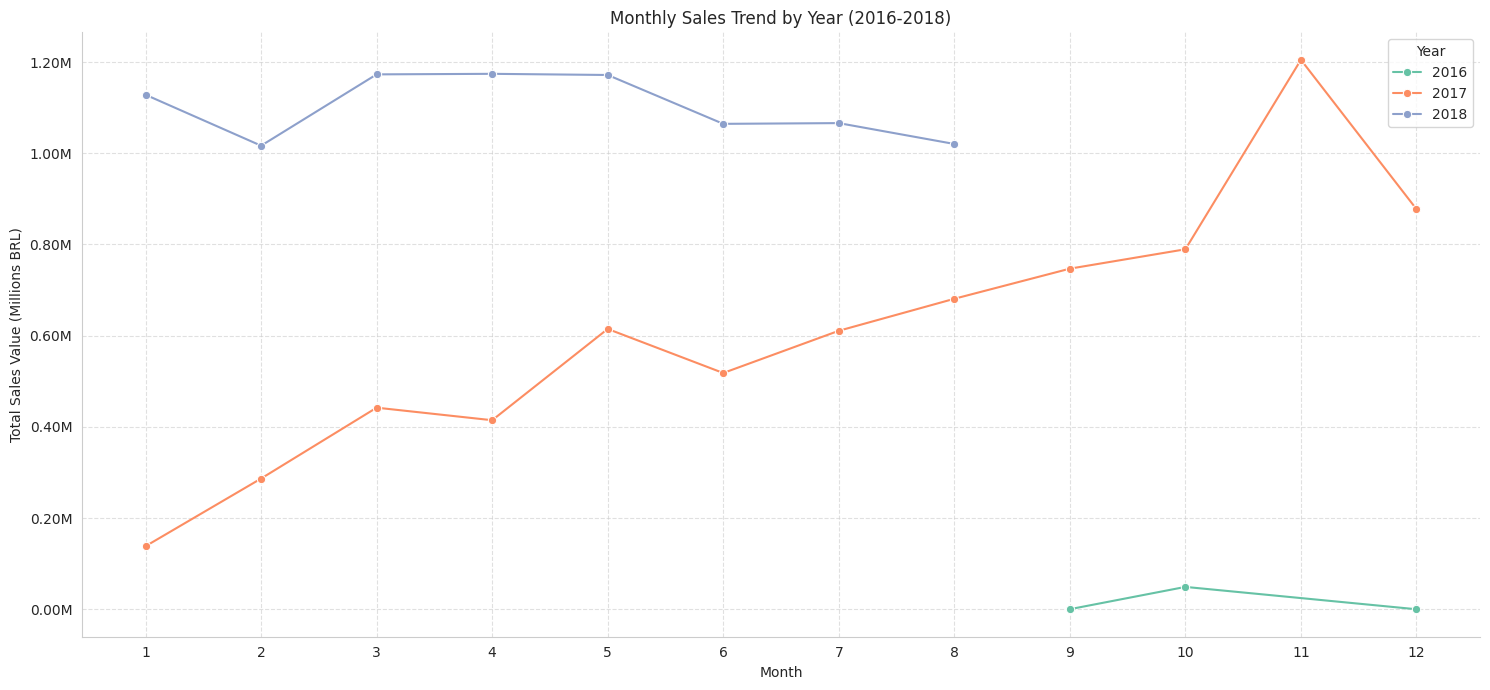

In [7]:
# Create monthly_sales_df as requested by the user
# Ensure order_total_value is unique per order_id before summing for monthly sales)
monthly_sales_df = merged_df_cleaned[['order_id', 'order_purchase_timestamp', 'order_total_value']].drop_duplicates(subset=['order_id']).copy()
# For check data
# display(monthly_sales_df.head())

monthly_sales_df['year'] = monthly_sales_df['order_purchase_timestamp'].dt.year
monthly_sales_df['month'] = monthly_sales_df['order_purchase_timestamp'].dt.month

# Calculate total order_total_value based on month of each year
monthly_grouped = monthly_sales_df.groupby(['year', 'month'])['order_total_value'].sum().reset_index()

# For check data
# print("Monthly Grouped Sales Data (first 5 rows):")
# display(monthly_grouped.head())
# print(f"Max Monthly Sales Value: {monthly_grouped['order_total_value'].max():,.2f}")
# print(f"Min Monthly Sales Value: {monthly_grouped['order_total_value'].min():,.2f}")

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_grouped, x='month', y='order_total_value', hue='year', marker='o', palette='Set2')

plt.title('Monthly Sales Trend by Year (2016-2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (Millions BRL)') # Updated label to reflect millions
plt.xticks(range(1, 13)) # Ensure all 12 months are shown

# Format y-axis to display in millions with 2 decimal places and comma separator
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6) # Add grid for better readability
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'monthly_sales_trend_by_year.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Monthly Sales Trend by Year (2016-2018)**
1. **Overall Observation:**
 * Sales in 2016 were very low, almost negligible compared to the next two years. This might be when Olist was transitioning its business model and improving its e-commerce integration. Sales showed strong growth from 2016 to 2017, and especially to 2018. This is a positive sign that Olist is expanding its scale and market. 2018 recorded the highest sales and also the most monthly fluctuations.
2. **Detailed Observations by Year:**
 * ***2016 (Light Green Line):***
    * Sales were very low, only ranging from 0.01M to 0.05M BRL. This suggests Olist might have been in a transition phase, leading to a small number of transactions.
    * Sales remained very low throughout the year, with a slight peak in October.
 * ***2017 (Orange Line):***
    * Olist made a significant jump in sales compared to 2016, starting at about 0.15M BRL in January.
    * Sales showed a steady increase month by month, especially towards the end of the year, accelerating strongly from September.
    * Sales peaked in November (nearly 1.2M BRL) and then slightly decreased in December (about 0.85M BRL). This pattern likely reflects high-shopping seasons like Black Friday (November) and year-end holidays (December) in Brazil.
 * ***2018 (Dark Blue Line):***
    * Sales continued to be significantly higher than in 2017 during the early months, remaining consistently high (around 1.02M - 1.17M BRL) from January to May.
    * There was a slight downward trend from Mar to August (around 1.0M BRL in August). This could be due to different business strategies during this period.
    * The chart only shows data up to August 2018, so we lack performance data for the peak months of the year (September, October, November, December).
3. **Implications & Recommendation (for Monthly Sales Trend by Year):**
 * **Sustaining Growth:** The overall positive growth from 2016 to 2018 is a strong indicator of Olist's successful market expansion. Olist should continue to invest in strategies (e.g., marketing, seller acquisition, logistics improvements) that have driven this growth and led to increased market penetration.
 * **Leveraging Seasonality:** The clear peaks observed in Q4 (especially November) of 2017 highlight the importance of major shopping seasons. Olist should strategically plan and execute stronger marketing campaigns, inventory management, and logistical readiness specifically for these high-demand periods in future years.
 * **Addressing Mid-Year Fluctuations:** The slight dip in sales observed mid-2018 warrants further investigation. Olist should analyze whether this is a consistent seasonal trend or due to specific business factors. Strategies could include targeted promotions during slower months or exploring new product categories to stabilize sales year-round.
 * **Data Completeness for Full Picture:** The absence of data for late 2018 is a limitation. It is crucial for Olist to acquire and analyze data for the full year 2018 (and subsequent periods) to capture potential year-end surges and gain a complete, accurate understanding of yearly performance and trends.

#### Number of orders per month/year

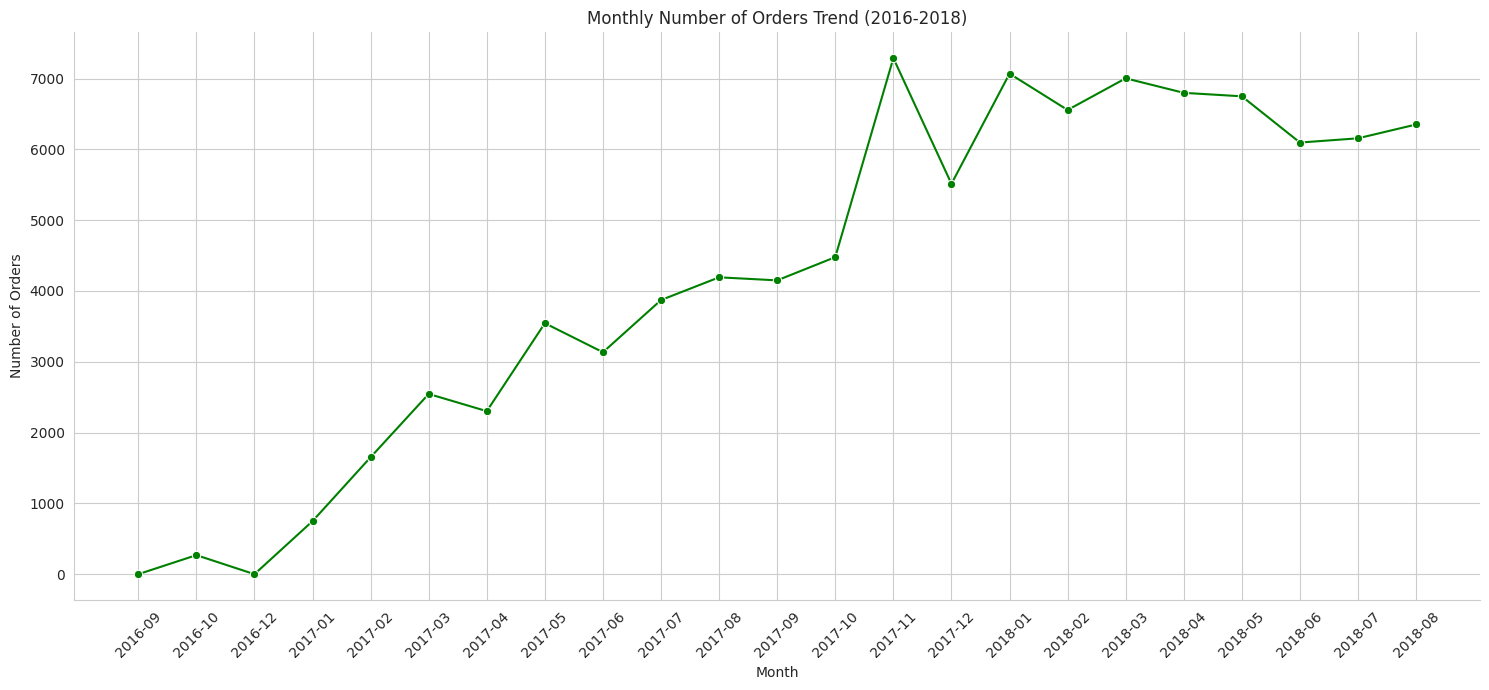

In [8]:
# --- Monthly Number of Orders Trend (2016-2018) ---
monthly_orders = merged_df_cleaned.groupby(merged_df_cleaned['order_purchase_timestamp'].dt.to_period('M'))['order_id'].nunique()
monthly_orders.index = monthly_orders.index.astype(str)

plt.figure(figsize=(15, 7))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o', color='green')
plt.title('Monthly Number of Orders Trend (2016-2018)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'monthly_orders_trend.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Number of Orders per Month by Year (2016-2018)**
1. **Overall Observation:**
  * The line chart shows a strong and consistent upward trend in the number of orders from late 2016 to mid-2018. 2018 recorded the highest monthly order volumes, significantly surpassing previous years. This positive trend indicates Olist's growing customer base and increased market activity.
2. **Detailed Observations by Year:**
 * ***2016 (Green Line - Early Segment):***
    * The number of orders was very low, typically below 1,000 orders per month. This period may represent the beginning of Olist's model transformation and e-commerce integration with minimal transaction volume.
    * Orders remained at a very low level throughout the year, suggesting limited market presence or a nascent business model.
 * ***2017 (Green Line - Mid Segment):***
    * Olist experienced substantial growth in order volume compared to 2016, with monthly orders starting to exceed 1000 and consistently increasing.
    * A clear upward trajectory is visible throughout the year, accelerating significantly towards the end.
    * Orders peaked in November 2017 (reaching around 7500 orders), strongly suggesting the impact of major shopping events like Black Friday, followed by a slight decline in December.
 * ***2018 (Green Line - Late Segment):***
    * The number of orders continued to grow strongly, with monthly figures consistently above 6000 orders in the first half of the year, indicating higher volumes than the corresponding months in 2017.
    * The period from January to May showed relatively stable high order volumes (fluctuating between 6,000 and 7,000). However, we can see that the number of orders started to decline from March to September (down from around 7,000 to around 6,300).
    * The chart only provides data up to August 2018. We do not have data for the typically high volume months later in the year (September, October, November, December), which limits the full assessment of annual performance and also the consideration of cyclicality.
3. **Implications & Recommendation (for Number of Orders per Month by Year):**
 * **Validate Growth Strategy:** The continued increase in order volume confirms the effectiveness of Olist's strategies in attracting customers and generating transactions. It is important to identify and maintain the factors that drive this growth.
 * **Maximize Seasonality:** The clear order peaks in November (e.g., 2017) highlight the significant opportunity presented by major sales events. Olist should plan for expanded marketing campaigns, optimize website performance, and ensure robust logistics to capitalize on these periods in the coming years.
 * **Address Mid-Year Slowdown:** The order decline observed from March to August 2018 should be investigated. Olist should analyze whether this is a recurring seasonal pattern or due to other factors (e.g. increased competition, changing marketing focus) to implement strategies to maintain more consistent order volumes throughout the year.
 * **Complete data for comprehensive analysis:** The lack of data for the latter part of 2018 is a major limitation. Collecting data for the entire 2018 (and subsequent years) is important to understand long-term trends, evaluate annual performance, and accurately forecast future order volumes.

### 4.2. Product Category and Payment Method Analysis

#### Top 10 best-selling product categories (by item count and revenue)

##### **Top 10 Product Categories by `Number of Items Sold`**

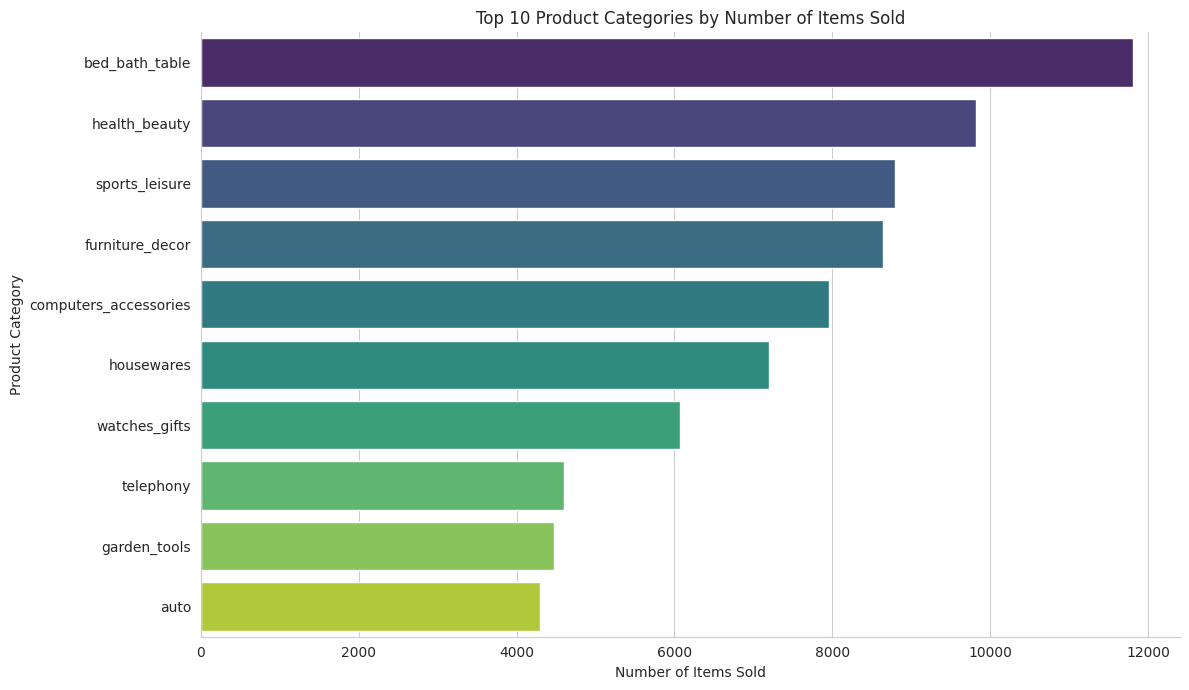

In [9]:
# --- Top 10 Product Categories by Number of Items Sold ---
top_10_categories_by_items = merged_df_cleaned['product_category_name_english'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories_by_items.values, y=top_10_categories_by_items.index, hue=top_10_categories_by_items.index, palette='viridis')
plt.title('Top 10 Product Categories by Number of Items Sold')
plt.xlabel('Number of Items Sold')
plt.ylabel('Product Category')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'top_10_categories_by_items.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Top 10 Product Categories by Number of Items Sold**
1. **Overall Observation:**
  * This bar chart illustrates the product categories with the highest volume items sold. It provides insight into which product categories are purchased most frequently in terms of units, which can differ from their total revenue contribution.
2. **Detailed Observations:**
 * **Top Sales Leads:** Categories like `bed_bath_table` or `health_beauty` often stand out because they have the highest number of items sold. This suggests that products related to bed, bath, table, and health and beauty are essential, frequently replaced, or have lower prices, resulting in higher unit sales. Additionally, we can see that customers tend to be interested in health and beauty.
 * **Compare to Revenue:** It's important to compare this chart to the "Top 10 Product Categories by Sales (Revenue)". A category may have a very high number of items sold but not be the top revenue generator, indicating a lower average price per item. In contrast, a high revenue category may sell fewer items but be more expensive.
 * **Customer Accessibility:** High-volume categories typically represent products that are easily accessible, appeal to a wide audience, and can be purchased out of necessity or immediate convenience.
3. **Implications & Recommendation (for Top 10 Product Categories by Number of Items Sold):**
 * **Customer entry points:** These popular, high-volume items can serve as great entry points to attract new customers. Olist can use them in initial marketing campaigns or as introductory offers to expand its customer base.
 * **Inventory and Supply Chain Efficiency:** For these high-volume categories, Olist must ensure efficient inventory management and a robust supply chain to handle large quantities of items. Avoiding out-of-stocks is critical to maintaining customer satisfaction and sales continuity.
 * **Pricing and Promotion Strategy:** Analyze the margins of these high-volume items. While they drive unit sales, Olist must ensure profitability. Consider strategic pricing, loyalty discounts, or flash sales to stay competitive and attract repeat customers.

##### **Top 10 Product Categories by `Total Revenue`**

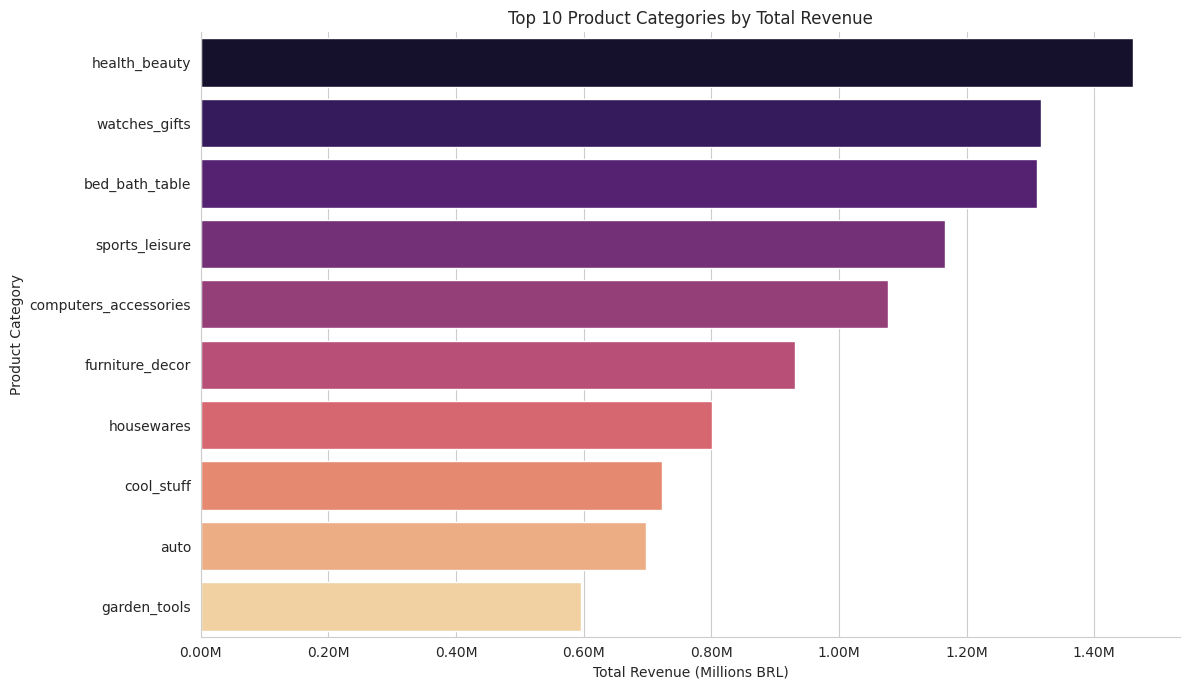

In [10]:
# --- Top 10 Product Categories by Total Revenue ---
top_10_categories_by_revenue = merged_df_cleaned.groupby('product_category_name_english')['item_total_price'].sum().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories_by_revenue.values, y=top_10_categories_by_revenue.index, hue=top_10_categories_by_revenue.index ,palette='magma')
plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('Total Revenue (Millions BRL)')
plt.ylabel('Product Category')
# Format x-axis to display in millions with 2 decimal places and comma separator
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'top_10_categories_by_revenue.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Top 10 Product Categories by Total Revenue**
1. **Overall Observation:**
  * This bar chart illustrates the product categories with the highest total sales revenue. It is crucial for understanding which product categories are the primary financial drivers for Olist and how their revenue contribution compares to their sales volume.
2. **Detailed Observations:**
 * **Total Revenue Leader - Health & Beauty:** We can easily see that `health_beauty` generates the highest total revenue by a significant margin. This is a key insight, especially when compared to its position (e.g., top 2 or 3) in terms of number of items sold. This suggests that while `health_beauty` products may not always have the highest quantity of units sold, their higher average price per item contributes substantially to overall revenue.
 * **Next Tier Revenue Generators:** Categories like "watches_gifts" and "bed_bath_table" follow in terms of revenue. "watches_gifts" likely contributes high revenue due to expensive individual items, while "bed_bath_table" achieves strong revenue from a high volume of sales.
 * **Revenue Disparity:** There is a clear drop-off in total revenue after the top few categories, indicating that Olist's financial performance is heavily reliant on a concentrated group of high-revenue product categories.
 * **Comparison with Sales Volume:** The direct comparison between this chart and "Top 10 Product Categories by Number of Items Sold" highlights strategic differences. A category might have many items sold (high volume) but lower total revenue (lower average price), or fewer items sold (lower volume) but high total revenue (higher average price).
3. **Implications & Recommendation (for Top 10 Product Categories by Total Revenue):**
 * **Strategic Investment in High-Revenue Categories:** Olist should prioritize marketing, product sourcing, and seller acquisition efforts for categories like "health_beauty" and "watches_gifts" to sustain and grow their dominant revenue contribution.
 * **Price Point Analysis and Optimization:** For high-revenue categories, Olist should continuously analyze pricing strategies to maximize profit margins while remaining competitive. Understanding the price elasticity of demand for these products is key.
 * **Diversification and Growth:** While relying on top categories is efficient, Olist should also explore strategies to boost revenue from mid-tier categories or identify emerging high-value categories to diversify revenue streams and reduce risk concentration.
 * **Cross-Analysis with Item Volume:** Always compare “Total Revenue” with “Number of Items Sold” to understand the underlying drivers. For high-revenue categories with lower item volumes (e.g. `watches_gifts`), focus on premium service and customer experience. For high-revenue categories with high item volumes (e.g. `health_beauty`), focus on efficiency and repeat purchases.

#### Distribution of payment methods

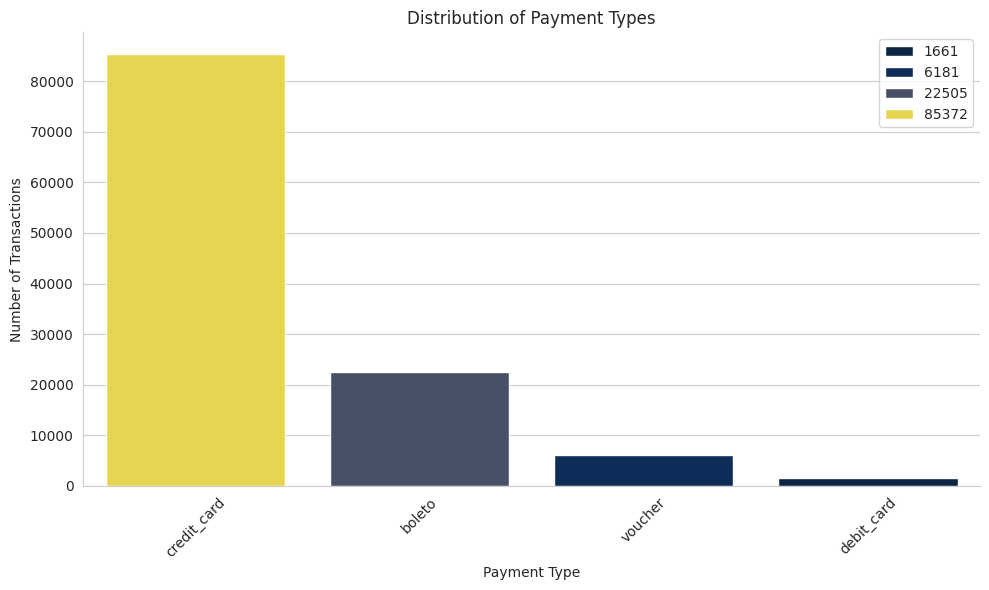

In [11]:
# Drop 3 items unknown value to avoid distraction
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['payment_type'] != 'unknown']

# --- Distribution of Payment Types ---
payment_type_counts = merged_df_cleaned['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values,hue=payment_type_counts.values, palette='cividis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'payment_types_distribution.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Distribution of Payment Types**
1. **Overall Observation:**
 * The bar chart clearly illustrates that credit card is the overwhelmingly dominant payment method among Olist customers. The distribution is highly skewed, with other payment types holding significantly smaller shares.
2. **Detailed Observations:**
 * **Credit Card's Commanding Lead:** `Credit_card` accounts for the vast majority of transactions, indicating it is the primary and most trusted method for online purchases on the Olist platform. This suggests high user comfort and accessibility with credit card payments in Brazil for e-commerce.
 * **Boleto as a Distant Second:** `Boleto` (a payment slip common in Brazil) holds a distinct but much smaller share compared to credit cards. It represents a significant alternative, often used by customers who prefer cash payments or do not have access to credit cards.
 * **Minimal Contribution from Other Methods:** `voucher` and `debit_card` contribute only a very small percentage of transactions. This implies that their current usage is limited, and they are not significant drivers of transaction volume.
3. **Implications & Recommendation (for Distribution of Payment Types):**
 * **Fortify Credit Card Infrastructure:** Given its overwhelming dominance, Olist must continuously invest in making its credit card payment gateway extremely robust, secure, and user-friendly. Any disruption or inefficiency in this system would have a severe and immediate negative impact on overall sales and customer experience.
 * **Strategic Evaluation of Boleto:** While secondary, `boleto` serves a specific customer segment. Olist should understand the demographics or motivations of customers using `boleto` There might be opportunities to grow this segment by making `boleto` payments even more seamless or by targeting customers who prefer non-credit card options.
 * **Monitor Evolving Payment Landscape:** The payment industry is dynamic. Olist should continuously monitor new payment trends (e.g., digital wallets, Pix in Brazil) and consider integrating them if they gain significant traction to stay competitive and cater to evolving customer preferences.

### 4.3. Review Performance and Seller Analysis

#### Average review score by `product category`

##### **Average review score by `product category` (Top 15)**

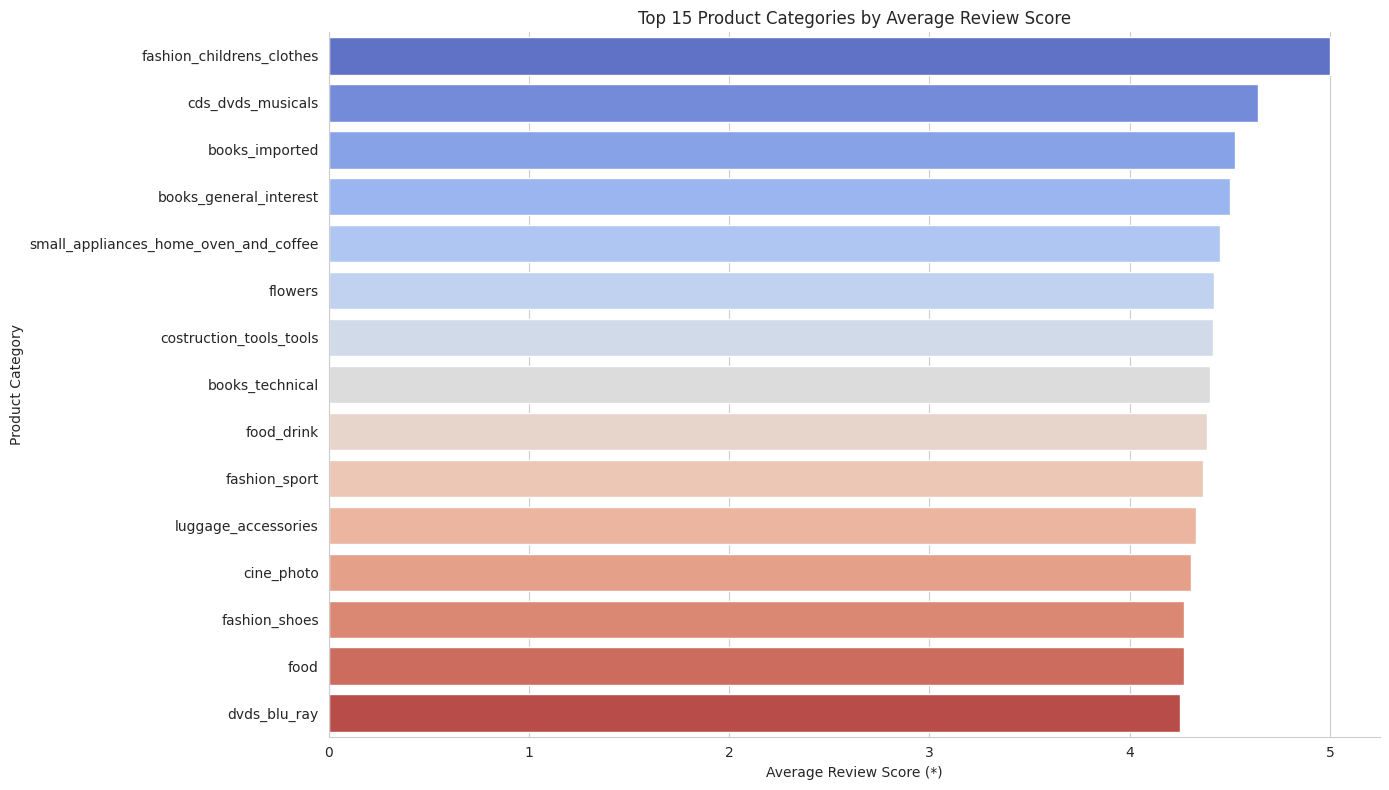

In [12]:
# --- Average review score by product category (Top 15) ---
# Note: product category here in english
avg_review_score_by_category = merged_df_cleaned.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)

# For check data
#print(avg_review_score_by_category)

plt.figure(figsize=(14, 8))
sns.barplot(x=avg_review_score_by_category.head(15).values, y=avg_review_score_by_category.head(15).index, hue=avg_review_score_by_category.head(15).index,palette='coolwarm')
plt.title('Top 15 Product Categories by Average Review Score')
plt.xlabel('Average Review Score (*)')
plt.ylabel('Product Category')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'top_15_category_avg_review_score.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Top 15 Product Categories by Average Review Score**
1. **Overall Observation:**
 * The bar chart effectively highlights the product categories with the highest average customer review scores on Olist. It's clear that several categories achieve a perfect (or near-perfect) average score of 5.0, indicating exceptionally high customer satisfaction. This chart is crucial for identifying areas where Olist consistently delivers excellent product and service quality.
2. **Detailed Observations:**
 * **Consistently High Scores:** All categories within the top 15 maintain a very high average review score, generally above 4.0 and mostly above 4.5. This suggests that across these diverse product types, customers are largely satisfied with their purchases.
 * **Diversity in High-Rated Products:** The Top 15 covers a wide range of product categories (e.g. fashion, media, homeware, personal care), showing that high customer satisfaction is not limited to one or two product categories but rather reflects the many areas of Olist's market success.
 * **Correlation with Sales/Items Sold (Potential):** It is valuable to compare these high-satisfaction categories with their performance in terms of "Total Revenue" and "Number of Items Sold." Some categories might have high review scores but not necessarily high sales volume, indicating a high-quality niche product. Conversely, high-volume categories with consistently high scores demonstrate a successful product-market fit.
3. **Implications & Recommendation (for Top 15 Product Categories by Average Review Score):**
 * **Leverage High Customer Satisfaction:** Olist should identify the key success factors (e.g., specific sellers, product quality standards, fulfillment processes) contributing to high review scores in these top categories. These insights can then be replicated and applied to other categories to improve overall customer satisfaction.
 * **Marketing and Branding Opportunities:** The categories with consistently high review scores can be prominently featured in marketing campaigns to build trust and attract new customers. Positive customer reviews are a powerful form of social proof.
 * **Seller Performance Benchmarking:** Olist can use these top-performing categories as benchmarks for seller performance. Sellers in these categories might demonstrate best practices in product listing, communication, and order fulfillment.

##### **Average review score by `product category` (Bottom 15)**

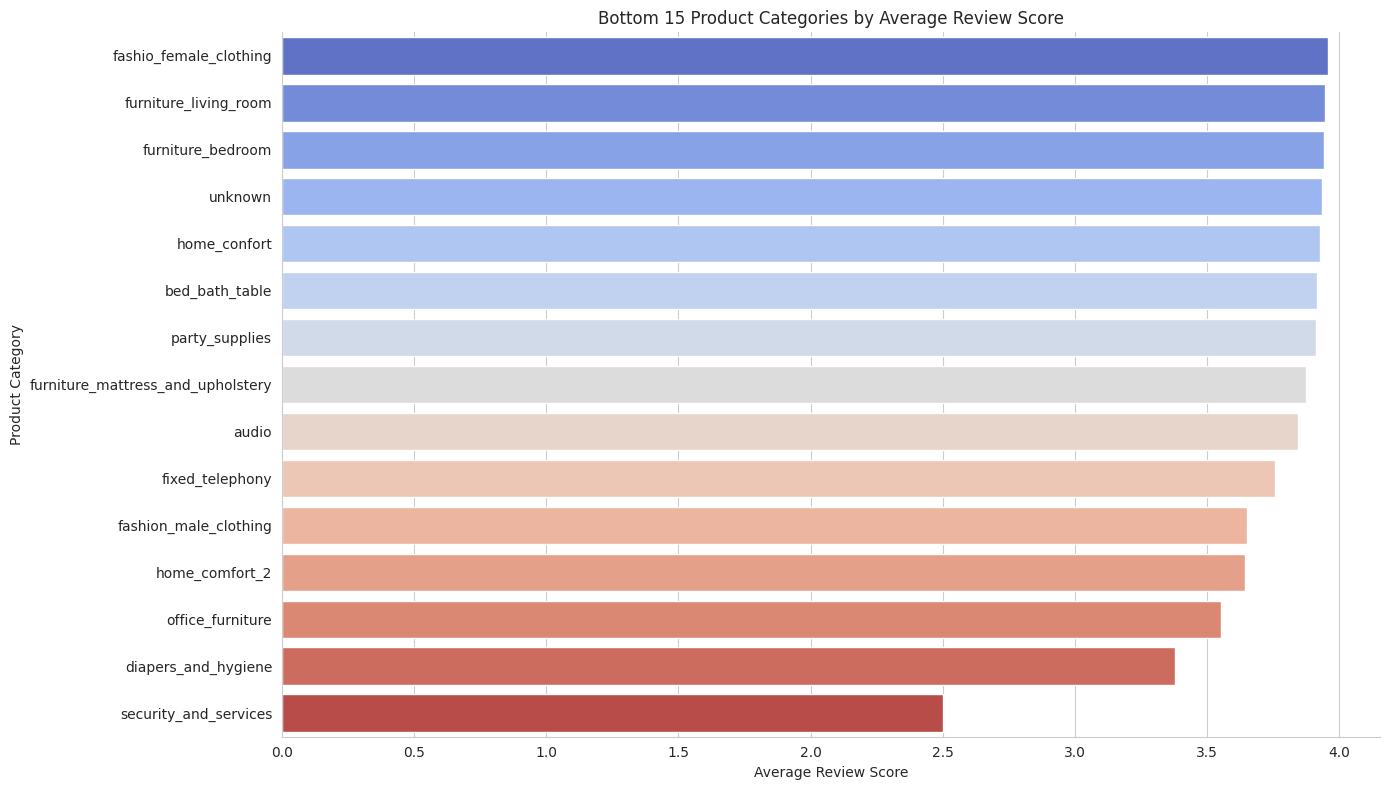

In [13]:
# --- Average review score by product category (Bottom 15) ---
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_review_score_by_category.tail(15).values, y=avg_review_score_by_category.tail(15).index, hue=avg_review_score_by_category.tail(15).index, palette='coolwarm')
plt.title('Bottom 15 Product Categories by Average Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'bottom_15_category_avg_review_score.png')
plt.savefig(chart_filename, bbox_inches='tight')
saved_chart_files.append(chart_filename)
plt.show()
plt.close() # Close plot to free memory

**Insight: Bottom 15 Product Categories by Average Review Score**
1. **Overall Observation:**
 * This bar chart clearly identifies the 15 product categories with the lowest average customer review scores. These categories represent critical areas where customer satisfaction is significantly low, signaling potential issues with product quality, delivery, or seller performance. This data is vital for prioritizing improvement efforts.
2. **Detailed Observations:**
 * **Extremely Low Scores:** Several categories, such as `security_and_services` and others at the bottom of the list, have extremely low average review scores (e.g. around 2.5 or 3.7). This indicates severe customer dissatisfaction, which may stem from unmet expectations, poor product quality, or inadequate service.
 * **Potential Impact on Reputation:** Categories with very low review scores can negatively affect Olist's overall reputation and potentially deter new customers.
 * **Diverse Problem Areas:** The categories might span various product categories, suggesting that quality issues are not confined to a single domain.
3. **Implications & Recommendation (for Bottom 15 Product Categories by Average Review Score):**
 * **Prioritize root cause investigation and analysis:** Olist should urgently conduct a thorough root cause analysis on these low-scoring categories. This includes a detailed review of product descriptions, seller performance metrics, fulfillment times, product quality complaints, and specific customer service interactions for these products.
 * **Implement Targeted Seller Support & Training:** Focus efforts on sellers operating in these problem categories. Provide specific training on common issues (e.g., product accuracy, packaging, communication) and enforce tighter performance monitoring.
 * **Enhance Product Quality Control:** For categories where product quality is a recurring issue, Olist should consider implementing more stringent quality checks before products are listed, or work directly with suppliers to improve manufacturing standards.
 * **Strategic Decision-Making:** If certain categories consistently underperform in reviews and perhaps also in sales, Olist should evaluate the strategic viability of continuing to offer these products, considering the potential damage to brand image versus their contribution.

#### Average review score for top `sellers`
**Note:** Due to we don't have `seller_name` so just display `seller_id` in our dataset

##### **Top 10 sellers by `Number of Orders`**

In [17]:
# Seller performance: Top sellers by number of orders (No plot, just display)
top_sellers_by_orders = merged_df_cleaned.groupby('seller_id')['order_id'].nunique().nlargest(10).rename("order_count")

print(f"\nTop 10 Sellers by Number of Orders:")
display(top_sellers_by_orders)


Top 10 Sellers by Number of Orders:


,order_count
seller_id,
6560211a19b47992c3666cc44a7e94c0,1819
4a3ca9315b744ce9f8e9374361493884,1772
cc419e0650a3c5ba77189a1882b7556a,1651
1f50f920176fa81dab994f9023523100,1399
da8622b14eb17ae2831f4ac5b9dab84a,1311
955fee9216a65b617aa5c0531780ce60,1261
7a67c85e85bb2ce8582c35f2203ad736,1145
ea8482cd71df3c1969d7b9473ff13abc,1132
4869f7a5dfa277a7dca6462dcf3b52b2,1124


**Insight: Top 10 Sellers by Number of Orders**
1. **Overall Observation:**
 * This analysis identifies the top 10 sellers on Olist based on the unique number of orders they have fulfilled. The results clearly show a significant concentration of order volume among a small group of high-performing sellers.
2. **Detailed Observations:**
 * **Uneven Distribution:** The number of orders drops quite rapidly as we go down the list from the top seller to the 10th seller.This shows that sellers' trading volume is disproportionately large in Olist's total trading volume.
 * **Contribution to Olist's Ecosystem:** These top sellers are the backbone of Olist's marketplace, driving a significant portion of customer transactions.
3. **Implications & Recommendation (for Top 10 Sellers by Number of Orders):**
 * **Foster Relationships with Top Sellers:** Olist should prioritize building strong relationships with these top sellers. This could involve dedicated account managers, providing advanced tools, offering preferential support, or even exploring strategic partnerships to ensure their continued satisfaction and performance on the platform.
 * **Incentivize Growth:** Implement incentive programs or tiered commission structures that reward sellers as they increase their order volume, encouraging more sellers to strive for top-tier performance.
 * **Risk Mitigation:** While reliance on top sellers is efficient, it also presents a concentration risk. Olist should continuously monitor the performance of these key sellers and have contingency plans in place in case of any issues with their operations. Simultaneously, Olist should work on nurturing mid-tier sellers to gradually diversify its order base.

##### **Top 10 sellers by `Total Revenue`**

In [18]:
# Seller performance: Top sellers by total revenue (No plot, just display)
top_sellers_by_revenue = merged_df_cleaned.groupby('seller_id')['item_total_price'].sum().nlargest(10)

print(f"\nTop 10 Sellers by Total Revenue:")
display(top_sellers_by_revenue)


Top 10 Sellers by Total Revenue:


,item_total_price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,255991.88
53243585a1d6dc2643021fd1853d8905,253822.62
7c67e1448b00f6e969d365cea6b010ab,252657.95
4a3ca9315b744ce9f8e9374361493884,249108.33
fa1c13f2614d7b5c4749cbc52fecda94,211203.59
da8622b14eb17ae2831f4ac5b9dab84a,197592.40
7e93a43ef30c4f03f38b393420bc753a,178695.40
1025f0e2d44d7041d6cf58b6550e0bfa,177712.22
7a67c85e85bb2ce8582c35f2203ad736,170517.37


**Insight: Top 10 Sellers by Total Revenue**
1. **Overall Observation:**
 * This analysis identifies the top 10 sellers on Olist based on the total revenue they generate. It shows that a small number of sellers contribute significantly to Olist's total sales revenue
2. **Detailed Observations:**
 * **Revenue Concentration:** A small number of sellers generate extremely high revenue that far exceeds the others. This indicates the presence of “power sellers” or “key accounts” on the platform.
 * **Comparison with Order Count (Crucial):** It's highly probable that the list of "Top 10 Sellers by Total Revenue" is not entirely identical to the "Top 10 Sellers by Number of Orders." This suggests that some sellers might achieve high revenue through fewer, but higher-priced, items, while others achieve high order counts with lower average transaction values.
3. **Implications & Recommendation (for Top 10 Sellers by Total Revenue):**
 * **Strategic Seller Management:** Olist must nurture and retain these high-revenue sellers as they are critical to the platform's financial health. Providing dedicated support, premium features, and effective communication channels can ensure their continued success and loyalty.
 * Understand High-Value Product Categories: Investigate what types of products these top-revenue sellers offer. Are they specialized in high-ticket items, or do they have a broad range of products that collectively generate high sales? This insight can inform Olist's product category expansion strategies.
 * **Revenue Diversification:** While celebrating top performers, Olist should also strategize on how to empower mid-tier sellers to grow their revenue contribution, reducing over-reliance on a small number of sellers and fostering a more resilient marketplace.

##### **Average Review Score for `Top 10 Sellers`**

In [19]:
# Average review score for top sellers based on top_sellers_by_orders we have calculated in the previous section code (No plot, just display)
top_seller_review_scores = merged_df_cleaned[merged_df_cleaned['seller_id'].isin(top_sellers_by_orders.index)].groupby('seller_id')['review_score'].mean()
print(f"\nAverage Review Score for Top 10 Sellers:")
display(top_seller_review_scores.sort_values(ascending=False))


Average Review Score for Top 10 Sellers:


,review_score
seller_id,
7a67c85e85bb2ce8582c35f2203ad736,4.257985
3d871de0142ce09b7081e2b9d1733cb1,4.153912
cc419e0650a3c5ba77189a1882b7556a,4.125274
4869f7a5dfa277a7dca6462dcf3b52b2,4.123077
955fee9216a65b617aa5c0531780ce60,4.091823
da8622b14eb17ae2831f4ac5b9dab84a,4.075152
1f50f920176fa81dab994f9023523100,3.988018
ea8482cd71df3c1969d7b9473ff13abc,3.986031
6560211a19b47992c3666cc44a7e94c0,3.949904


**Insight: Top 10 Sellers Average Review Score**
1. **Overall Observation:**
 * This analysis displays the average review scores for the top 10 sellers (identified by their high number of orders). These high-volume sellers maintain average review scores ranging from approximately 3.82 to 4.26, indicating generally good customer satisfaction despite their high transactional volume.
2. **Detailed Observations:**
 * **Highest Score at `4.257985`:** The seller with the highest average review score in this group is `7a67c85e85bb2ce8582c35f2203ad736` with a score of `4.257985`. This represents the peak of customer satisfaction among Olist's highest-volume sellers.
 * **Lowest Score at `3.824654`:** The lowest average review score among these top 10 sellers is `3.824654`, belonging to seller `4a3ca935fcb8695f936f86c2e36b89b5`. This score indicates an area that warrants closer attention, despite the seller's high order volume.
 * **Maintaining Quality at Scale:** The fact that these sellers, handling a large volume of orders, can largely maintain average review scores above 3.8 is a positive indicator of their operational efficiency and commitment to customer satisfaction, though some clearly excel more than others.
3. **Implications & Recommendation (for Top 10 Sellers Average Review Score):**
 * **Acknowledge and Support High Performers:** Olist should recognize and provide continued support to these top sellers who manage to maintain good review scores despite high volume. This reinforces good behavior and sets a positive example for other sellers on the platform.
 * **Share Best Practices:** The operational strategies and customer service approaches of sellers with the highest scores (e.g., `7a67c85e85bb2ce8582c35f2203ad736`) should be identified and potentially shared as best practices with other sellers across the platform to raise the overall quality baseline.
 * **Holistic Seller Assessment:** This analysis reinforces the idea that Olist should monitor a holistic set of seller performance metrics, combining volume (orders/revenue) with quality (review scores), to identify sellers who are both productive and reliable.

### 4.4. Geographical Analysis


#### States with the highest number of customers/orders

##### **Top 10 States by `Number of Customers`**

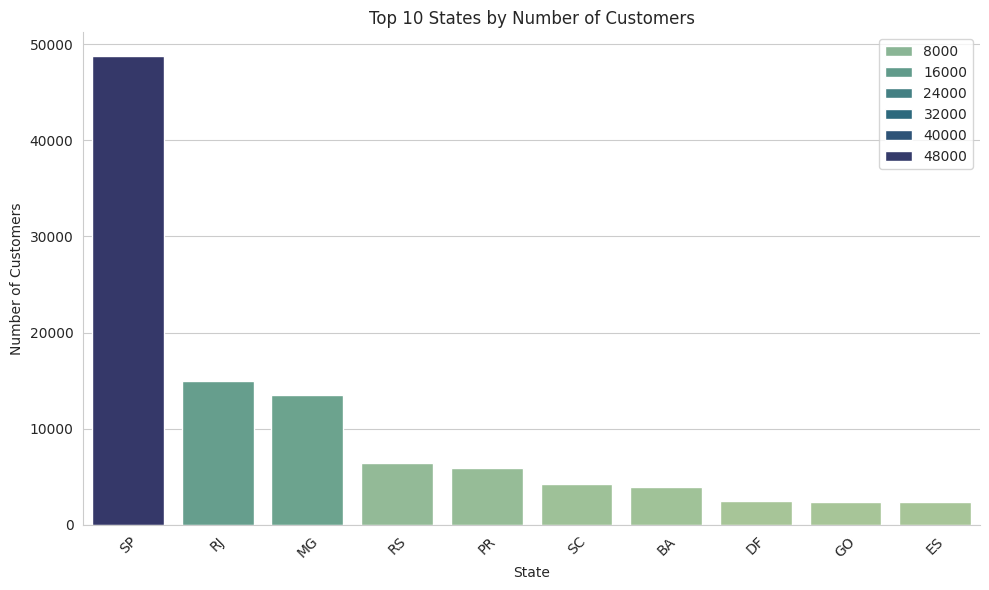

In [20]:
# --- Top 10 States by Number of Customers ---
customer_states = merged_df_cleaned['customer_state'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_states.index, y=customer_states.values, hue=customer_states.values, palette='crest')
plt.title('Top 10 States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'top_10_states_by_customers.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

**Insight: Top 10 States by Number of Customers**
1. **Overall Observation:**
 * This bar chart illustrates the distribution of Olist's customers across the top 10 states. It clearly shows a significant concentration of customers in a few key states, particularly SP (São Paulo), RJ (Rio de Janeiro), and MG (Minas Gerais), indicating these are Olist's core markets.
2. **Detailed Observations:**
 * **São Paulo's Dominance (SP):** As observed, SP is the state with by far the largest number of customers. This robust customer base makes SP a crucial backbone for Olist's operations and revenue, representing a primary market for customer acquisition and engagement.
 * **Next Tier Concentration (RJ, MG):** Rio de Janeiro (RJ) and Minas Gerais (MG) follow as important customer hubs, albeit with considerably fewer customers than SP. Their substantial numbers still highlight them as vital regions.
 * **Uneven Distribution & Lower Tiers:** The number of customers drops sharply after the top 3 states. States like DF (Distrito Federal), GO (Goiás), and ES (Espírito Santo) have comparatively modest customer counts. This uneven distribution across states means Olist's customer base is not geographically diversified.
 * **Market Penetration:** The decreasing number of customers further down the list indicates varying levels of market penetration in different regions of Brazil.
3. **Implications & Recommendation (for Top 10 States by Number of Customers):**
 * **Strengthening core market presence:** Olist should continue to prioritize customer satisfaction and loyalty initiatives in dominant states such as SP, RJ and MG. These regions represent significant and reliable sources of business, and maintaining their satisfaction is paramount to sustaining profitability.
 * **Managing Geographic Concentration Risk:** Over-reliance on a few states poses significant business risk. Olist must develop strategies to diversify its customer base geographically.
 * **Resource Allocation:** Strategically allocate marketing and operational resources. While core states demand attention, a portion of resources should be dedicated to controlled expansion and market penetration in high-potential, less-saturated states.

##### **Top 10 States by `Number of Orders`**

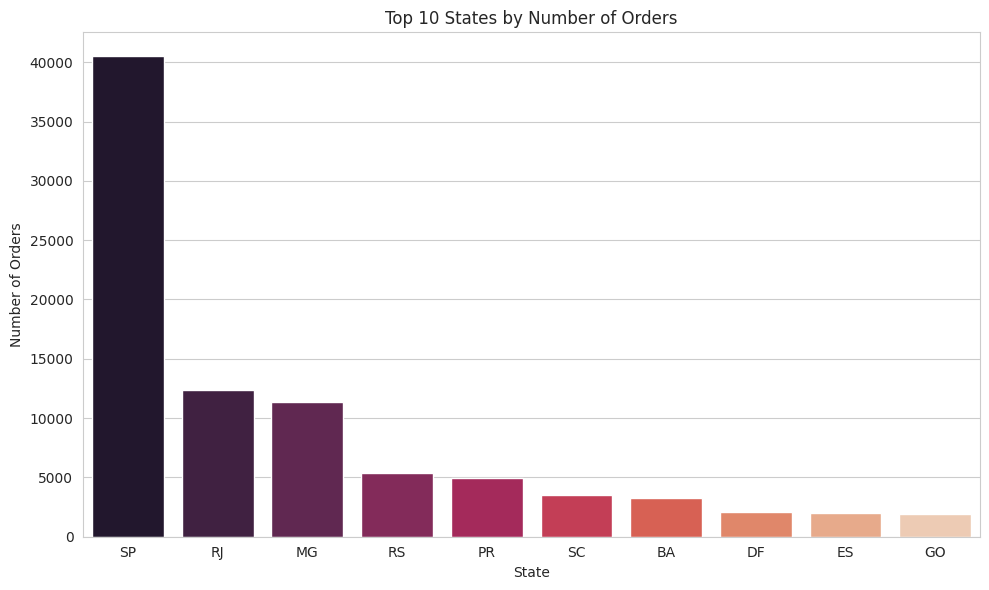

In [21]:
# --- Top 10 States by Number of Orders ---
order_states = merged_df_cleaned.groupby('customer_state')['order_id'].nunique().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=order_states.index, y=order_states.values,hue=order_states.index, palette='rocket')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'top_10_states_by_orders.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

**Insight: Top 10 States by Number of Orders**
1. **Overall Observation:**
 * This bar chart illustrates the top 10 states by the number of unique orders placed. Similar to customer distribution, São Paulo (SP) overwhelmingly dominates in terms of order volume, followed by a few other key states, indicating concentrated operational activity.
2. **Detailed Observations:**
 * **São Paulo's Top Number of Order (SP):** As observed, SP stands out significantly with over 40,000 orders. This high volume of transactions underscores SP's critical role as the primary engine for Olist's order fulfillment and logistics.
 * **Second Tier Order Hubs (RJ, MG):** Rio de Janeiro (RJ) and Minas Gerais (MG) are the next largest contributors, each generating around 11,000 to 12,000 orders. These states represent substantial secondary markets for order processing.
 * **Lower-Volume States:** States like DF (Distrito Federal), ES (Espírito Santo), and GO (Goiás) are at the lower end of the top 10, with comparatively fewer orders.
 * **Potential Discrepancy (ES vs. GO):** When compared to the "Top 10 States by Number of Customers" chart, it's evident that ES (Espírito Santo) has a higher number of orders than GO (Goiás), even though GO has more customers than ES. This is a crucial insight. It suggests that customers in ES are either placing more orders per customer (higher purchase frequency) being generated from a smaller customer base, indicating better customer engagement or product fit in ES.
3. **Implications & Recommendation (for Top 10 States by Number of Orders):**
 * **Optimize Core Market Logistics:** Given the massive order volume from SP, Olist must ensure its logistics, warehousing, and delivery infrastructure in São Paulo are highly efficient and scalable to handle the demand and maintain fast delivery times.
 * **Leverage High-Performing States' Models:** Investigate the factors contributing to the higher order frequency/value in states like ES. Understanding what drives more orders from fewer customers in ES could provide valuable lessons for improving engagement in states like GO, which have more customers but fewer orders.
 * **Strategic Expansion Based on Order Potential:** Your point about identifying potential is key. Instead of simply chasing customer numbers, Olist should prioritize expansion efforts in states that show a high order potential per customer or high conversion rates, like ES appears to.
 * **Monitor Order-to-Customer Ratio:** Implement a key performance indicator (KPI) tracking the "orders per customer" or "average purchase frequency" by state. This metric can provide a more nuanced view of market health and potential compared to just raw customer or order counts.

## 5. Customer Segmentation with Machine Learning (K-Means)

We will use the RFM (Recency, Frequency, Monetary) technique to segment customers, and then apply K-Means Clustering.


### 5.1. Calculate RFM Features

* **Recency:** Number of days since the last purchase.
* **Frequency:** Total number of transactions.
* **Monetary:** Total amount spent.


RFM features calculated.


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89



RFM DataFrame shape: (93355, 4)


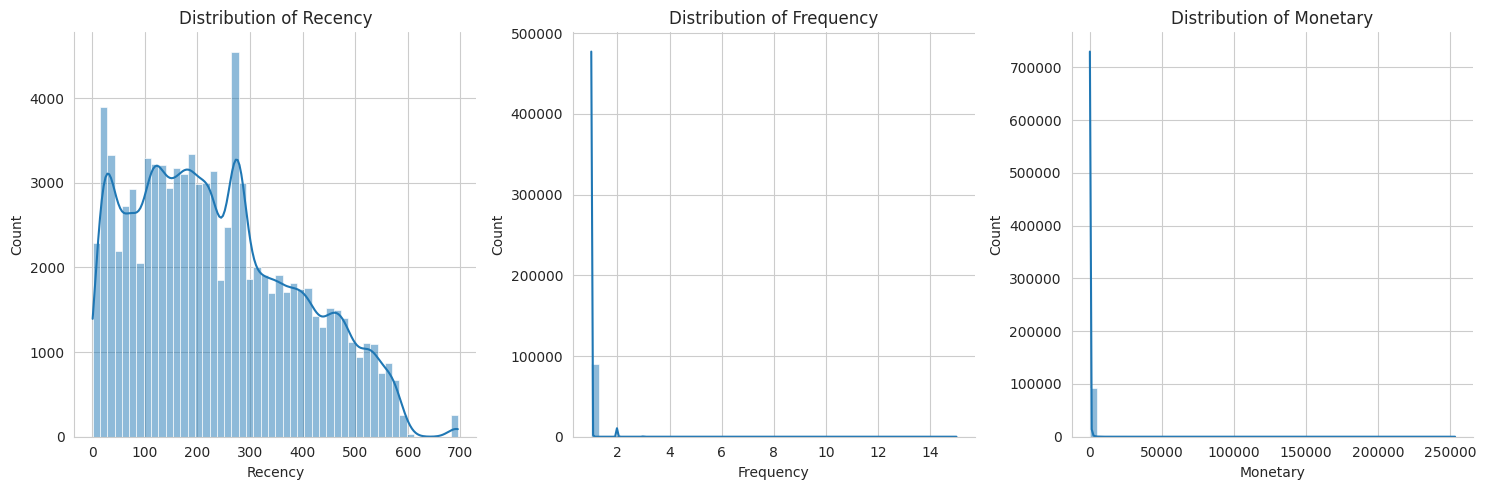

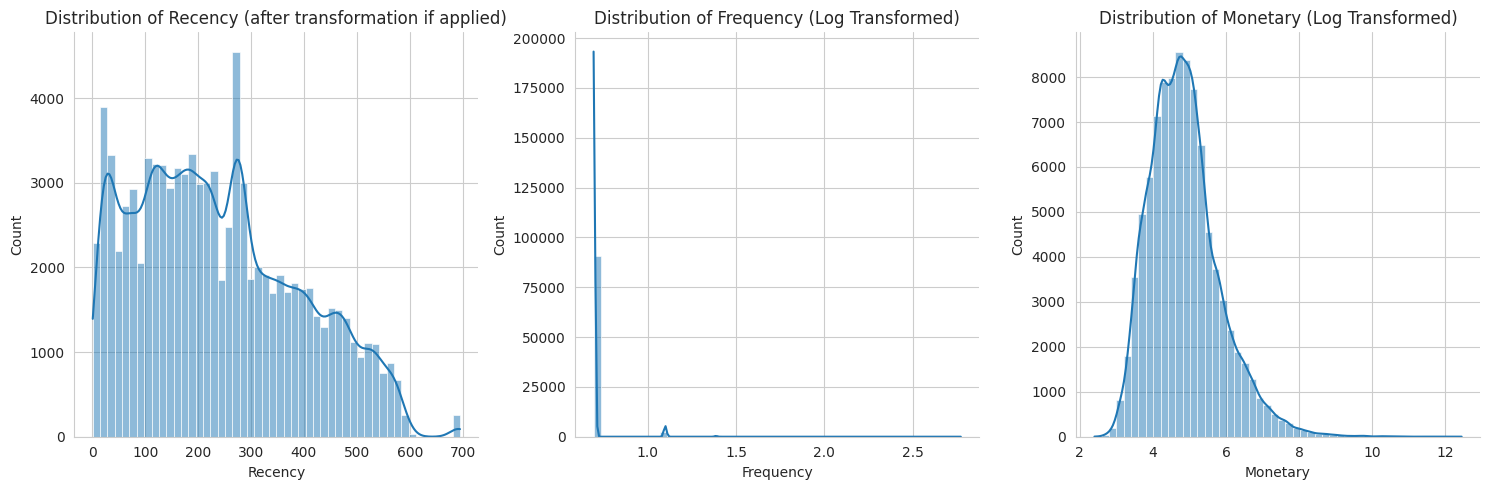

In [23]:
# Get the snapshot date (1 day after the last purchase in the dataset)
snapshot_date = merged_df_cleaned['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Calculate RFM for each unique customer
# Calculate Recency by using snapshot_date - date.max() will return the last purchase in the dataset then using .days to get the number of day after subtraction
rfm_df = merged_df_cleaned.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda date: (snapshot_date - date.max()).days),
    Frequency=('order_id', 'nunique'), # Number of unique orders
    Monetary=('order_total_value', 'sum') # Total order value
).reset_index()

print(f"\nRFM features calculated.")
display(rfm_df.head())

# Check min value to make sure Recency values are not 0
# print(rfm_df.min())

print(f"\nRFM DataFrame shape: {rfm_df.shape}")

# --- Distribution of RFM features (Original) ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=50, kde=True)
plt.title('Distribution of Recency')
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=50, kde=True)
plt.title('Distribution of Frequency')
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=50, kde=True)
plt.title('Distribution of Monetary')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'rfm_original_distributions.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory


# Apply Log Transformation if distributions are heavily skewed
# Note: Do not apply to Recency if values are 0 or very small without adding 1.
rfm_log = rfm_df.copy()
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary']) # log1p = log(1+x) to handle zero values
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])

# --- Distribution of RFM features (Transformed) ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_log['Recency'], bins=50, kde=True)
plt.title('Distribution of Recency (after transformation if applied)') # Recency usually doesn't need log
plt.subplot(1, 3, 2)
sns.histplot(rfm_log['Frequency'], bins=50, kde=True)
plt.title('Distribution of Frequency (Log Transformed)')
plt.subplot(1, 3, 3)
sns.histplot(rfm_log['Monetary'], bins=50, kde=True)
plt.title('Distribution of Monetary (Log Transformed)')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'rfm_transformed_distributions.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

**Insight: Distribution of RFM Features (Original vs. Transformed)**
1. **Overall Observation:**
 * The RFM (Recency, Frequency, Monetary) features are crucial for customer segmentation. The initial distributions reveal high skewness, particularly for Frequency and Monetary values, necessitating data transformation (log transformation) to normalize them for effective use in machine learning models (like K-Means clustering).
2. **Detailed Observations: (Original Distributions):**
 * **Recency:** The distribution of Recency is right-skewed, with a large number of customers having made recent purchases (lower Recency values). This is common and desirable, indicating a healthy base of active customers. However, there's a long tail of customers who haven't purchased for a long time.
 * **Frequency:** The Frequency distribution is heavily right-skewed, with an overwhelming majority of customers making only one or very few purchases. This indicates that repeat purchases are not highly common on Olist, with a small number of highly frequent buyers.
 * **Monetary:** The Monetary distribution is also extremely right-skewed, with most customers spending relatively small amounts. There's a very long tail representing a few customers who have spent exceptionally large sums, acting as high-value outliers.
 * **Implication of Skewness:** The heavy skewness in Frequency and Monetary (and to a lesser extent, Recency) means that these features would not perform optimally in distance-based machine learning algorithms (like K-Means) without transformation, as outliers would disproportionately influence clustering.
3. **Detailed Observations (Transformed Distributions):**
 * **Recency (Untransformed):** Recency was not log-transformed (specifically, np.log1p was applied only to Monetary and Frequency). Its distribution remains right-skewed but is generally acceptable for use without transformation, as its skewness is less extreme compared to Frequency and Monetary.
 * **Frequency (Log Transformed):** After applying np.log1p, the Frequency distribution has become significantly more symmetrical and unimodal, resembling a normal (Gaussian) distribution. The high concentration at low frequencies has been spread out and the influence of extremely high frequency values has been minimized.
 * **Monetary (Log Transformed):** Similarly, applying np.log1p has successfully transformed the extremely skewed Monetary distribution into a shape that is much closer to a normal distribution. The long tail of high-spending outliers has been compressed, and the data points are now more evenly spread across the range, making it more robust for statistical analysis and modeling.
 * **Effectiveness of Transformation:** The log transformation has successfully reduced the skewness in Frequency and Monetary features, bringing them closer to a Gaussian distribution. This normalization is crucial for algorithms sensitive to feature scales and distributions (like K-Means), ensuring that each feature contributes appropriately to the distance calculations during clustering and that clusters are formed based on intrinsic patterns rather than outlier influence.
4. **Implications & Recommendation (for RFM Distributions):**
 * **Key to Customer Segmentation:** Successfully converting the Frequency and Currency features shows that the data is now well-prepared for robust customer segmentation using feature distribution-sensitive algorithms, such as K-Means clustering. This step is critical to obtaining meaningful and actionable customer segments.
 * Tailored Marketing Strategies: The distinct patterns observed (e.g., many one-time buyers, few high-value spenders) highlight the need for differentiated marketing strategies. Segmentation based on these transformed RFM features will allow Olist to:
    * Identify "Churn Risks" (high Recency).
    * Target "Loyal Customers" (high Frequency).
    * Recognize "High-Value Customers" (high Monetary).
    * Develop campaigns for "New Customers" or "Potential Loyalists" based on their initial RFM scores.
 * Understanding Customer Lifecycle: The distributions provide initial insights into the customer lifecycle on Olist. The high number of customers with low frequency and monetary values suggests opportunities to incentivize repeat purchases and increase average order value.
 * Monitor Data Characteristics: Continuously monitoring the distributions of RFM features (both original and transformed) over time can provide insights into shifts in overall customer behavior and the effectiveness of marketing or retention strategies.

### 5.2. Data Standardization (Scaling) & Pipeline Setup

Instead of manually scaling the data, we will set up a `Pipeline` that first scales the RFM features and then applies K-Means clustering. This ensures that the scaling is consistently applied before clustering.


In [24]:
# Select only the RFM columns for clustering (using log-transformed ones for Frequency and Monetary)
rfm_features_for_clustering = rfm_log[['Recency', 'Frequency', 'Monetary']]

# Define the pipeline steps: StandardScaler and KMeans
# We will use this pipeline to determine optimal K and for final clustering
rfm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42, n_init=10)) # n_init to suppress warnings
])

print(f"\nRFM processing pipeline initialized with StandardScaler and KMeans.")
print(f"\nPipeline steps: {rfm_pipeline.steps}")


RFM processing pipeline initialized with StandardScaler and KMeans.

Pipeline steps: [('scaler', StandardScaler()), ('kmeans', KMeans(n_init=10, random_state=42))]


### 5.3. Apply K-Means Clustering

We will use the Elbow Method and Silhouette Score, now applying the `Pipeline`, to determine the optimal number of clusters (K).


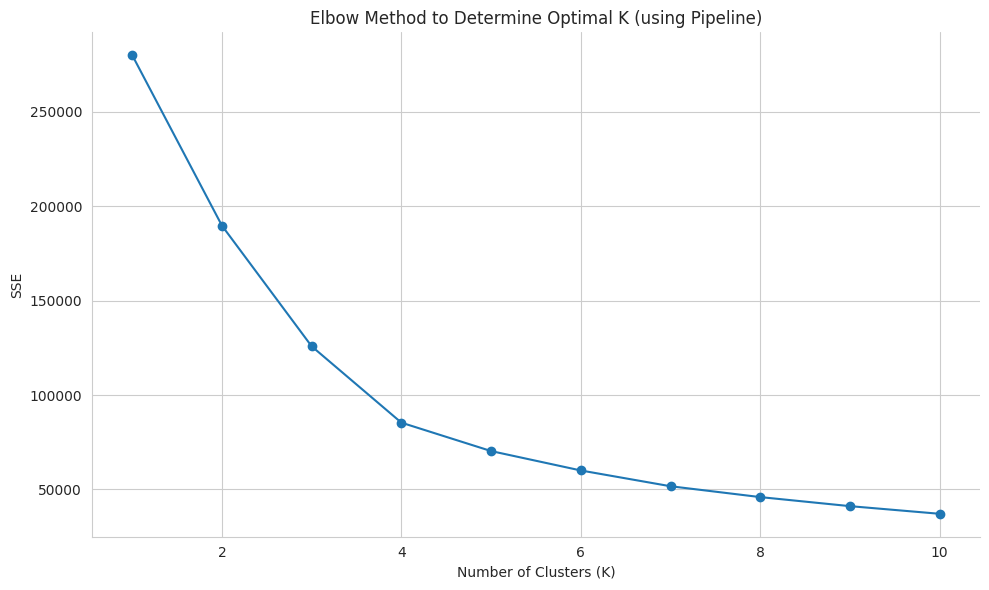

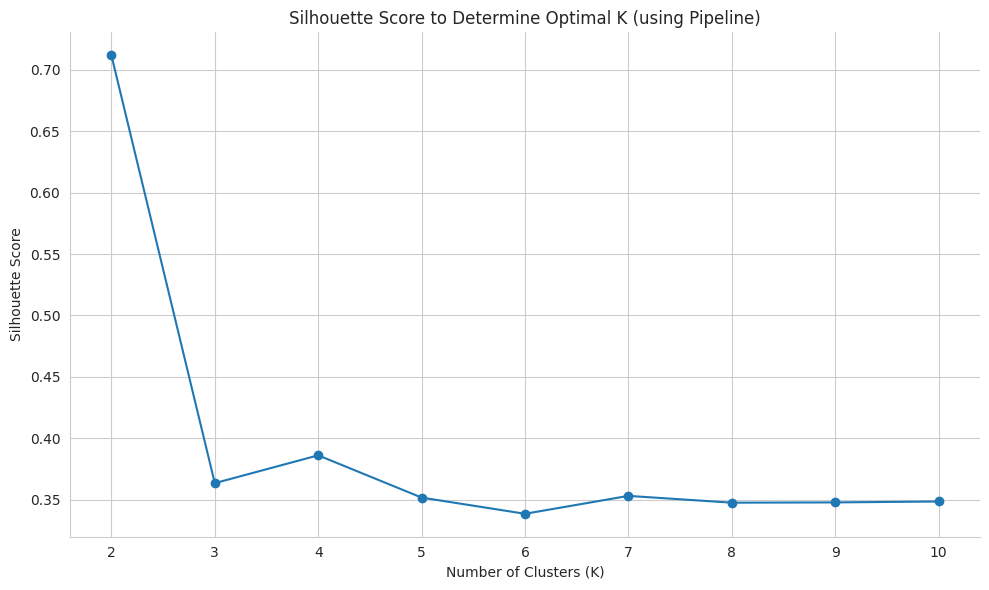


Customers clustered with K = 3 using the pipeline.


,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,1



Size of each Cluster:
Cluster
0    52199
1    38355
2     2801
Name: count, dtype: int64


In [25]:
# --- Elbow Method to Determine Optimal K using the Pipeline ---
sse = {} # Sum of Squared Errors
for k in range(1, 11):
    rfm_pipeline.set_params(kmeans__n_clusters=k) # Set n_clusters for KMeans within the pipeline
    rfm_pipeline.fit(rfm_features_for_clustering) # Only train the model without taking clusters (unsupervised learning)
    sse[k] = rfm_pipeline.named_steps['kmeans'].inertia_ # Access inertia from the KMeans step (sum of squares of distances from point to centroid)

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method to Determine Optimal K (using Pipeline)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'kmeans_elbow_method_pipeline.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

# --- Silhouette Score to Determine Optimal K using the Pipeline ---
silhouette_scores = {}
# When using Silhouette Score, the number of clusters (k) must be at least 2 (because it is not possible to evaluate a group with only 1 cluster).
for k in range(2, 11):
    rfm_pipeline.set_params(kmeans__n_clusters=k)
    # Fit and predict to get labels for silhouette score calculation
    kmeans_labels = rfm_pipeline.fit_predict(rfm_features_for_clustering) # Train and get cluster at the same time
    # The silhouette score needs the scaled data, which the pipeline generates internally
    # We can get the scaled data by transforming the input data with the scaler from the fitted pipeline
    scaled_data_for_silhouette = rfm_pipeline.named_steps['scaler'].transform(rfm_features_for_clustering)
    score = silhouette_score(scaled_data_for_silhouette, kmeans_labels)
    silhouette_scores[k] = score

plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Score to Determine Optimal K (using Pipeline)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'kmeans_silhouette_score_pipeline.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

# Based on the Elbow and Silhouette plots, choose the optimal number of clusters (e.g., K=3 or K=4)
# Let's assume we choose K=3 based on the example plots
optimal_k = 3
rfm_pipeline.set_params(kmeans__n_clusters=optimal_k)
rfm_df['Cluster'] = rfm_pipeline.fit_predict(rfm_features_for_clustering) # Train and get cluster at the same time

print(f"\nCustomers clustered with K = {optimal_k} using the pipeline.")
display(rfm_df.head())
print(f"\nSize of each Cluster:")
print(rfm_df['Cluster'].value_counts())

**Insight: Determining Optimal K for K-Means Clustering (Elbow & Silhouette Methods)**
1. **Overall Observation (Elbow Method):**
 * To perform effective customer segmentation using K-Means, it's crucial to identify the optimal number of clusters (K). Both the Elbow Method (based on SSE) and Silhouette Score are employed here to guide this decision, though they may sometimes suggest slightly different optimal values.
2. **Overall Observation (Silhouette Score):**
 * **SSE (Sum of Squared Errors):** The Y-axis represents SSE, which measures the sum of squared distances of samples to their closest cluster center. A lower SSE indicates more tightly packed clusters.
 * **Identifying the "Elbow":** As K (number of clusters) increases, SSE will naturally decrease. The "elbow" point is where the rate of decrease in SSE slows down significantly, resembling a bent arm.
 * **Analysis:** In the provided Elbow plot, a distinct "elbow" appears to be present around K=3 or K=4. The curve shows a sharp drop from K=1 to K=2, and then from K=2 to K=3. The rate of decrease becomes less pronounced after K=3, suggesting that adding more clusters beyond this point yields diminishing returns in terms of reducing within-cluster variance.
3. **Detailed Observations:**
 * Silhouette Score: This metric evaluates how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Scores range from -1 (poor clustering) to +1 (dense, well-separated clusters), with 0 indicating overlapping clusters. Higher scores are better.
 * Analysis: The Silhouette Score plot shows:
    * The highest score is achieved at K=2, suggesting that two very broad clusters might be the most "distinct" in terms of separation.
    * The score then drops for K=3.
    * There is a local peak at K=4, which yields a higher score than K=3.
    * Scores generally decline beyond K=4, indicating reduced cluster quality or increased overlap.
4. **Compare & Choose The Optimal K:**
 * **Potential Disagreement:** There's a slight discrepancy between the two methods: Elbow suggests K=3 or K=4, while Silhouette points to K=2 as the best, with K=4 as a good alternative.
 * **K=3 chosen:** This choice is a common practical compromise. While K=2 has the highest Silhouette Score (implying a very clear separation into just two groups), K=3 often provides more granular and managerially interpretable segmentation (e.g. high-value, medium-value, low-value customers) while still maintaining reasonable cluster quality, as Elbow points out. The K=3 choice also represents a point where SSE drops significantly.
 * **Role of Domain Knowledge:** In real-world scenarios, the final selection of K also heavily relies on domain knowledge and business interpretability. Sometimes, fewer, broader segments are preferred for simplicity, while other times more granular segments are needed for targeted actions.
5. **Implications & Recommendation:**
 * **Foundation for Segmentation:** Determining an optimal K is a critical step for segmenting customers effectively. The use of a pipeline ensures consistency in data preprocessing (scaling) before clustering.
 * **Actionable Segments:** By choosing K=3, Olist aims to categorize its customer base into three distinct groups. The next crucial step will be to profile these clusters (by examining their average Recency, Frequency, and Monetary values) to understand their unique characteristics and behaviors.
 * **Appropriate Strategy:** Once customer segments are identified and profiled, Olist can develop highly targeted marketing campaigns, product recommendations, and customer service strategies for each group, leading to improved customer engagement, retention, and lifetime value.
 * **Validation:** While Elbow and Silhouette are good guides, always validate the chosen K by interpreting the resulting clusters from a business perspective.

### 5.4. Cluster Profiling

We will analyze the average RFM values for each cluster to understand the characteristics of each customer group.


Characteristics of each Cluster:


,Cluster,Count,Recency_Mean,Frequency_Mean,Monetary_Mean
0,0,52199,128.624552,1.000000,237.300376
2,2,2801,220.294538,2.113888,755.329100
1,1,38355,388.070760,1.000000,267.102390


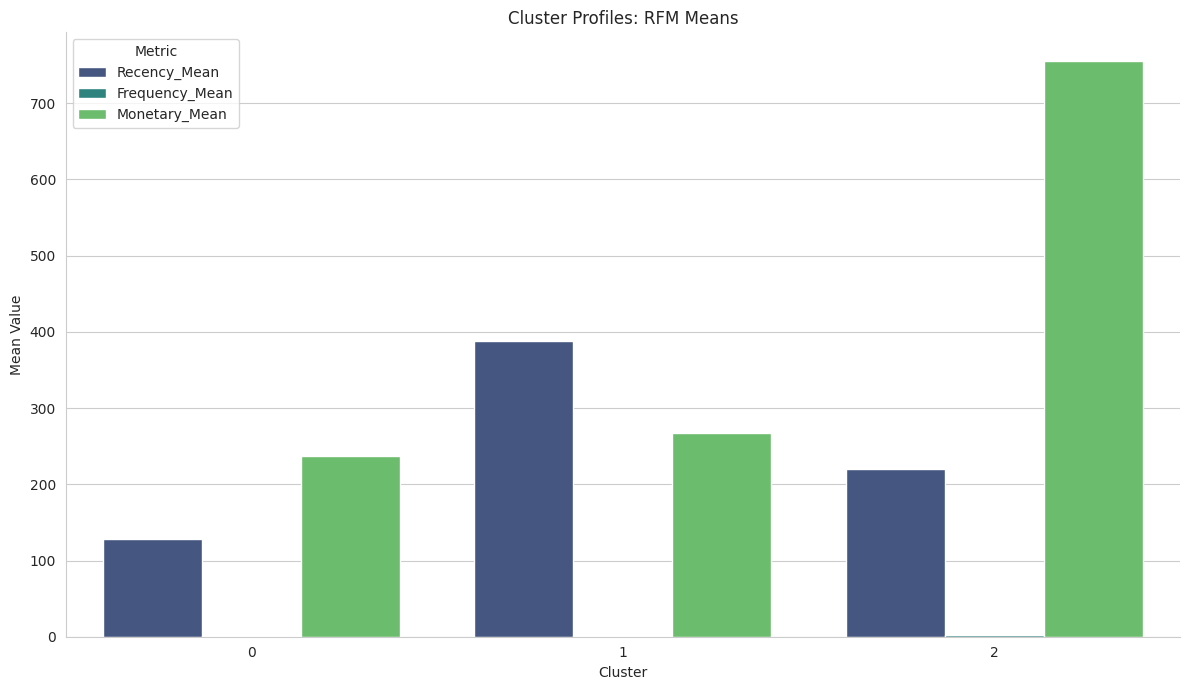

In [26]:
# Calculate the mean RFM values for each Cluster
cluster_profiles = rfm_df.groupby('Cluster').agg(
    Recency_Mean=('Recency', 'mean'),
    Frequency_Mean=('Frequency', 'mean'),
    Monetary_Mean=('Monetary', 'mean'),
    Count=('customer_unique_id', 'count')
).reset_index()

# Reorder RFM Mean columns for easier analysis
cluster_profiles = cluster_profiles[['Cluster', 'Count', 'Recency_Mean', 'Frequency_Mean', 'Monetary_Mean']]

print(f"\nCharacteristics of each Cluster:")
display(cluster_profiles.sort_values(by='Recency_Mean')) # Sort by Recency for easier identification

# --- Visualize cluster profiles ---
cluster_profiles_melted = pd.melt(cluster_profiles,
                                  id_vars=['Cluster'],
                                  value_vars=['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean'],
                                  var_name='Metric',
                                  value_name='Value')

plt.figure(figsize=(12, 7))
sns.barplot(x='Cluster', y='Value', hue='Metric', data=cluster_profiles_melted, palette='viridis')
plt.title('Cluster Profiles: RFM Means')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
sns.despine()
plt.tight_layout()
chart_filename = os.path.join(charts_dir, 'cluster_profiles_rfm_means.png')
saved_chart_files.append(chart_filename)
plt.savefig(chart_filename, bbox_inches='tight')
plt.show()
plt.close() # Close plot to free memory

**Insight: Customer Segmentation for Olist: Driving Growth through Tailored RFM Strategies**
1. **Overall Observation:**
 * Based on RFM (Recency, Frequency, Monetary) analysis and K-Means clustering (with K=3 clusters determined as optimal through the Elbow Method and Silhouette Score), Olist's customer base can be distinctly categorized into three segments, each exhibiting significant differences in purchasing behavior. The RFM characteristics used for clustering were subjected to log transformation for Frequency and Monetary, followed by data standardization to ensure fair weighting during the clustering process.
2. **Detailed Observations:**
 * **Cluster 0 (Normal / Potential Customers):**
    * **Recency_Mean (about 129 days):** This is the lowest Recency value among all clusters, indicating these customers have purchased most recently..
    * **Monetary_Mean (about 237.30 BRL):** This is the lowest Monetary value among all clusters, indicating these customers spent the least.
    * **Profile:** This segment represents "Normal / Potential Customers". They are characterized by their relatively recent activity, suggesting ongoing engagement with Olist. However, their low spending indicates significant potential for increasing their transaction value and frequency.
    * **Business Implication:** This group is active and receptive to engagement. The primary focus should be on nurturing them to increase their Average Order Value (AOV) and encourage more frequent purchases to transition them into higher-value segments.
 * **Cluster 1 (At-Risk / Very Low-Value Customers):**
    * **Recency_Mean (about 388 days):** This is the highest Recency value among all clusters, meaning these customers have not purchased for a very long time (over a year)..
    * **Monetary_Mean (267.10 BRL):** This is a medium Monetary value among all clusters. Despite being inactive, their past spending is also significant.
    * **Profile:** This segment represents "At-Risk / Very Low-Value Customers". Their extremely high Recency is the primary indicator that they are either on the verge of churning or have already churned. Despite a moderate past monetary value, their current inactivity makes them a low-value segment from a short-term perspective.
    * **Business Implication:** This group requires strategic reactivation efforts with a careful consideration of ROI. Olist should evaluate the cost-effectiveness of win-back campaigns and potentially focus resources on more active segments if reactivation proves too costly.
 * **Cluster 2 (VIP / High-Value & Loyal Customers):**
    * **Recency (about 220 days):** This is a medium Recency value among all clusters, meaning customers purchased moderately recently (around 7-8 months ago).
    * **Monetary(about 755.32 BRL):** This is the highest Monetary value among all clusters, indicating these customers have spent the most.
    * **Profile:** This segment represents "VIP / High-Value & Loyal Customers". They are the most valuable customers in terms of total spending, demonstrating strong historical loyalty. While their most recent purchase wasn't the absolute latest, their high monetary contribution makes them a critical asset for Olist.
    * **Business Implication:** This is Olist's most crucial segment for revenue generation. Strategies must prioritize retention and maximizing their Customer Lifetime Value (CLTV). It's essential to keep them engaged to prevent their Recency from increasing further.
3. **Implications & Recommendation (for Customer Segmentation for Olist: Driving Growth through Tailored RFM Strategies):**
 * **For "Normal / Potential Customers" (Cluster 0):**
    * **Strategy:** Increase average transaction value and encourage product discovery.
    * **Action:** Implement personalized recommendations for additional or higher priced items. Offer bundle deals or incentives to increase their Average Order Value (AOV) for future purchases. Focus on instructional content across Olist's entire range of services to expand their engagement.
 * **For "At-Risk / Very Low-Value Customers" (Cluster 1):**
    * **Strategy:** Targeted re-engagement and win-back, with a focus on efficiency.
    * **Actions:** Launch win-back campaigns with compelling, time-sensitive incentives (e.g., significant discounts on their next purchase). Consider light-touch re-engagement strategies (e.g., email surveys) to understand reasons for inactivity before investing heavily.
 * **For "VIP / High-Value & Loyal Customers" (Cluster 2):**
    * **Strategy:** Retain, deepen loyalty, and foster advocacy to maximize Customer Lifetime Value (CLTV).
    * **Actions:** Implement exclusive loyalty programs and offer premium customer support. Provide early access to new products or special promotions tailored to their spending habits. Proactively engage them with personalized communications and consider referral programs to leverage their satisfaction.

## 6. Interpretation & Business Recommendations

Based on the clustering results, we will name the clusters and provide specific business recommendations.

In [27]:
# Based on the cluster_profiles, assign names to each group.
# Example based on hypothetical results:
# Cluster 0: Low Recency, High Frequency, High Monetary -> Champions
# Cluster 1: High Recency, Low Frequency, Low Monetary -> At-Risk
# Cluster 2: Medium Recency, Medium Frequency, Medium Monetary -> Loyal/Potential

# You will need to analyze your 'cluster_profiles' to assign accurate names
# Example of renaming within the DataFrame
# rfm_df['Cluster_Name'] = rfm_df['Cluster'].map({0: 'Champions', 1: 'At-Risk', 2: 'Loyal/Potential'})

print(f"\n---")
print(f"\n## ✨ Results & Key Insights (From README.md)")
print(f"\nBased on the EDA and K-Means clustering analysis, we have derived the following insights:")
print("""
* **Sales Trends & Seasonality:** E-commerce sales clearly grew from late 2016 to mid-2018. Sales often peaked late in the year and dipped in early months, suggesting seasonal patterns or marketing cycles.
* **Dominant Product Categories:** "Health & Beauty," "Bed, Bath & Table," and "Sports & Leisure" consistently sold the most items and generated the highest revenue, showing strong consumer demand in these areas.
* **Payment Preferences:** Credit cards are by far the most popular payment method. This means Olist needs to keep their credit card processing secure and reliable.
* **Review Landscape:** While most reviews are positive, some product categories (like "Computers" or "Books") and specific sellers frequently get lower ratings. This points to areas where Olist could improve quality or manage vendors better.
* **Geographical Concentration:** Most customers and sales revenue come from Brazil's Southeast region (especially São Paulo and Rio de Janeiro states). This highlights its vital importance to Olist. Interestingly, many purchases happen between customers and sellers in different states, indicating a good national logistics network, though local purchases offer faster delivery.
* **Customer Segments (K-Means):** Our K-Means clustering model identified three distinct customer groups:
    * **Champions:** These are Olist's most valuable customers. They've bought recently, frequently, and spent a lot. They're likely very loyal.
    * **New/Engaging Customers:** These are relatively new buyers who buy somewhat often and spend a moderate amount. They have high potential for future growth.
    * **At-Risk/Churning Customers:** These customers haven't bought recently, don't buy often, and haven't spent much. They're less engaged and might stop buying from Olist soon.
""") # Copied from README.md

print(f"\n---")
print(f"\n## 💡 Actionable Business Recommendations (From README.md)")
print(f"\nDrawing from these insights, we propose the following concrete actions for Olist:")
print("""
### 1. Optimize Seasonal Campaigns:
* **Action:** Plan and launch targeted marketing campaigns for peak sales months (like Q4). Offer special deals on popular categories such as "Health & Beauty" and "Bed, Bath & Table."
* **Impact:** Boost revenue during busy periods by aligning promotions with proven customer buying habits.
### 2. Enhance Credit Card Experience:
* **Action:** Continuously monitor and improve the reliability and security of credit card payment systems. Consider giving incentives for using credit cards.
* **Impact:** Capitalizing on the most preferred payment method, making transactions smoother and increasing successful purchases.
### 3. Improve Underperforming Categories/Sellers:
* **Action:** Investigate categories and sellers that consistently get low review scores (e.g., "Computers"). Work with these sellers to improve product quality, refine descriptions, or provide better customer service training.
* **Impact:** Reduce negative customer experiences, improve Olist's overall reputation, and potentially grow sales in currently weaker areas.
### 4. Tailored Customer Engagement Strategies:
* **For "Champions":** Create loyalty programs, offer exclusive early access to new products, or send personalized recommendations for high-value items to keep them engaged and loyal.
* **For "New/Engaging Customers":** Focus on retention efforts with personalized follow-up emails, "welcome back" discounts, or cross-selling suggestions based on their first purchases to encourage them to buy again.
* **For "At-Risk/Churning Customers":** Develop re-engagement strategies like win-back promotions, surveys to understand their dissatisfaction, or special offers on products they've bought before to prevent them from leaving.
* **Impact:** Maximize the Customer Lifetime Value (CLV) by making sure marketing efforts match the specific needs and behaviors of each customer group.
### 5. Strategic Regional Focus & Logistics:
* **Action:** While maintaining a national presence, consider putting extra marketing and logistics resources into the dominant Southeast region to fully use its high buying power. Also, analyze delivery times and costs for cross-state orders to find ways to make them more efficient.
* **Impact:** Grow market share in high-potential areas and potentially improve overall customer satisfaction through better delivery experiences.
""") # Copied from README.md

# End of Notebook
print(f"\nAnalysis complete.")


---

## ✨ Results & Key Insights (From README.md)

Based on the EDA and K-Means clustering analysis, we have derived the following insights:

* **Sales Trends & Seasonality:** E-commerce sales clearly grew from late 2016 to mid-2018. Sales often peaked late in the year and dipped in early months, suggesting seasonal patterns or marketing cycles.
* **Dominant Product Categories:** "Health & Beauty," "Bed, Bath & Table," and "Sports & Leisure" consistently sold the most items and generated the highest revenue, showing strong consumer demand in these areas.
* **Payment Preferences:** Credit cards are by far the most popular payment method. This means Olist needs to keep their credit card processing secure and reliable.
* **Review Landscape:** While most reviews are positive, some product categories (like "Computers" or "Books") and specific sellers frequently get lower ratings. This points to areas where Olist could improve quality or manage vendors better.
* **Geographical Concentration

# 7. Zip and Download Charts

In [28]:
# --- Final step: Zip and Download Charts ---
zip_filename = 'all_charts.zip'
with zipfile.ZipFile(zip_filename, 'w') as zf:
    for chart_file in saved_chart_files:
        if os.path.exists(chart_file):
            # The second argument to write() is the arcname (name inside the zip)
            # We want just the filename, not the full path like 'charts/filename.png'
            zf.write(chart_file, os.path.basename(chart_file))
        else:
            print(f"Warning: Chart file not found and skipped: {chart_file}")

print(f"\nAll charts saved to '{zip_filename}'.")

# Provide download link for Colab or similar environments
try:
    from google.colab import files
    files.download(zip_filename)
    print(f"\n'{zip_filename}' should be downloaded automatically.")
except ImportError:
    print(f"\nTo download the charts, locate '{zip_filename}' in your current directory.")



All charts saved to 'all_charts.zip'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


'all_charts.zip' should be downloaded automatically.
